In [3]:
End_Date='2021-03-01'
Begin_Date='2021-02-01'
frequency='月度'
saving_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\pic'
data_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\data'
fontname='simfang.ttf'
font_path=r'C:\Users\sherr\Tools' #笔记本
script_path=r'C:\Users\sherr\Sherry\SQL\Qizhongji\python_script'

In [ ]:
#%% Import Packages
from sqlalchemy import create_engine
import pyodbc 
import urllib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter
import random
import seaborn as sns
from datetime import datetime,timedelta,date
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
from docx import Document
from docx.shared import Inches
from docx.oxml.ns import qn
from docx.shared import Cm, Pt
from docx.shared import RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import warnings
import time
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei']
#%% Plotting functions
def SchemeColors(colormap,n,colorrange=[0.3,0.8],reverse=False):
    randomlist=np.linspace(colorrange[0],colorrange[1],n)
    colors=[]
    for i in randomlist:
        cmap=plt.get_cmap(colormap)
        color=cmap(i)
        colors.append(color)
    if reverse:
        return colors[::-1]
    else:
        return colors
#USED
def CuteTwoAxisPlotting(data,index_col,value_col_1,value_col_2,value_col_3=None,
                        xlim=None,figsize=[30,25],title='I am Cute TwoAxis Bar Chart',
                        pad=150,unit1='台',unit2='台',colors=None,text_distance=0.03,bar_width=0,sort=True,
                       legend_location=[1.04,1.08],saving_name='图片'):
    if colors is None:
        cmaps=['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
                         'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
                         'hot', 'afmhot', 'gist_heat', 'copper']
        random_list=random.sample(range(0,len(cmaps)),2)
        colors=[]
        for i in random_list:
            color=SchemeColors(cmaps[i],2,colorrange=[0.5,0.8])
            colors.append(color)
        color_1,color_2,color_3=colors[1][0],colors[0][0],colors[1][1]
    else:
        color_1,color_2,color_3=colors[0],colors[1],colors[-1]
    fontname='simfang.ttf'
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=38)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=58)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=32)
    if sort:
        df=data.sort_values(value_col_1,ascending=True)
    else:
        df=data.copy()
    label=df[index_col]
    index=range(len(label))
    fig,ax=plt.subplots(figsize=figsize)
    if value_col_3:
        value_1=df[value_col_1]
        value_2=df[value_col_2]
        value_3=df[value_col_3]
        font_4=FontProperties(fname=font_path+'\\'+'msyh.ttc',size=32)
        scale_3=max(value_1)/max(max(value_3),0.001)
        value_3_sca=value_3*scale_3*0.8
        ax.barh(index,value_1,bar_width,color=color_1,label=value_col_1)
        ax.barh(index,value_2,bar_width,color=color_2,label=value_col_2)
        ax.barh(index,-value_3_sca,bar_width,color=color_3,label=value_col_3)
        if xlim is None:
            plt.xlim(-max(value_3_sca)*1.8,max(value_1)*1.18)  
        else:
            plt.xlim(xlim[0],xlim[1])
        for i ,j in zip(value_1,index):
            plt.text(i+text_distance*3.8,j,str(i)+unit1,fontproperties=font_3,ha='center',va='center')
        for i,j in zip(value_2,index):
            plt.text(i+text_distance,j,str(i),fontproperties=font_4,ha='left',va='center',color=color_2)
        for i,j,k,l in zip(value_3,index,value_3_sca,value_2):
            if l==0 and k==0:
                plt.text(-k-text_distance,j,'N/A',fontproperties=font_3,ha='right',va='center')
            else:
                plt.text(-k-text_distance,j,str(round(i*100))+'%',fontproperties=font_3,ha='right',va='center')
        plt.legend(fontsize=25,ncol=3,bbox_to_anchor=(legend_location))
    else:
        value_1=df[value_col_1]
        value_2=df[value_col_2]
        scale_2=max(value_1)/max(max(value_2),0.001)
        value_2_sca=value_2*scale_2*0.4
        ax.barh(index,-value_2_sca,bar_width,color=color_2,label=value_col_2)
        ax.barh(index,value_1,bar_width,color=color_1,label=value_col_1)
        if xlim is None:
            plt.xlim(-max(value_2_sca)*1.18,max(value_1)*1.18)  
        else:
            plt.xlim(xlim[0],xlim[1])
        for i ,j in zip(value_1,index):
            plt.text(i+text_distance,j,str(int(i))+unit1,fontproperties=font_3,ha='left',va='center')
        for i,j,k in zip(value_2,index,value_2_sca):
            plt.text(-k-text_distance,j,str(int(i))+unit2,fontproperties=font_3,ha='right',va='center')
        plt.legend(fontsize=25,ncol=2,bbox_to_anchor=(legend_location))    
    ax.yaxis.grid()
    ax.set_axisbelow(True)
    plt.yticks(index,label,fontproperties=font_1)
    plt.xticks(value_1,'')
    ax.tick_params(width=0)
    ax.spines['bottom'].set_linewidth(0)   
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    ax.axvline(0,color='black')
    plt.title(title,fontproperties=font_2,pad=pad)
    plt.savefig(saving_path+'//'+saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()

#USED
def NumPlotting(data,index_col,value_col,percent_col=None,line_show=False,fontname='simfang.ttf',
                title='统计表',unit='台',color='lightblue',text_distance=0.037,sort=True,is_v=True,
                bar_width=0.5,fontsize=[35,25],saving_name='图片',figsize=[30,30]):
    if sort:
        df=data.sort_values(value_col,ascending=True)
    else:
        df=data.copy()
    label=df[index_col]
    values=df[value_col]
    index=range(len(label))
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=38)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=58)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=33)
    fig,ax=plt.subplots(figsize=figsize)
    if is_v:
        ax.barh(index,values,bar_width,color=color)
        plt.yticks(index,label,fontproperties=font_1)
        plt.title(title,fontproperties=font_2,pad=30)
        ax.spines['bottom'].set_linewidth(0)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        ax.spines['left'].set_linewidth(0)
        plt.xticks(values,'')
        ax.tick_params(width=0)
        if percent_col:
            value_2=df[percent_col]
            for i,j,k in zip(values,index,value_2):
                plt.text(i+max(values)*text_distance,j,str(i)+unit+' /',fontproperties=font_1,ha='center',va='center')
                plt.text(i+max(values)*3*text_distance,j,str(round(k*100,1))+"%",fontproperties=font_1,ha='center',va='center')    
        else:
            for i ,j in zip(values,index):
                plt.text(i+max(values)*text_distance,j,str(i)+unit,fontproperties=font_1,ha='center',va='center')
    else:
        ax.bar(index,values,bar_width,color=color)
        plt.xticks(index,label,fontproperties=font_1)
        plt.title(title,fontproperties=font_2,pad=30)
        ax.spines['bottom'].set_linewidth(0)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        ax.spines['left'].set_linewidth(0)
        plt.yticks(values,'')
        ax.tick_params(width=0)
        plt.ylim(0,max(values)*1.2)
        if percent_col:
            value_2=df[percent_col]
            for i,j,k in zip(values,index,value_2):
                plt.text(j,i+max(values)*text_distance,str(i)+unit+' /',fontproperties=font_1,ha='center',va='center')
                plt.text(j,i+max(values)*3*text_distance,str(round(k*100,1))+"%",fontproperties=font_1,ha='center',va='center')    
        else:
            for i ,j in zip(values,index):
                plt.text(j,i+max(values)*text_distance,str(round(i))+unit,fontproperties=font_1,ha='center',va='center')
    if line_show:
        plt.plot(index,values,color='black')
        
    plt.savefig(saving_path+'//'+saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()
#USED
def LinePlotting(data,index_col,value_col,fontname='simfang.ttf',title='统计表',unit='台',
                 color='lightblue',text_distance=0.037,sort=True,bar_width=0.5,
                saving_name='图片'):
    if sort:
        df=data.sort_values(value_col,ascending=True)
    else:
        df=data.copy()
    label=df[index_col]
    values=df[value_col]
    index=range(len(label))
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=38)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=58)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=33)
    font_4=FontProperties(fname=font_path+'\\'+'msyh.ttc',size=33)
    fig,ax=plt.subplots(figsize=[30,15])
    plt.plot(index,values,color=color,linewidth=4,marker ="o",markersize=20)
    plt.xticks(index,label,fontproperties=font_1)
    plt.title(title,fontproperties=font_2,pad=30)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    plt.yticks(values,'')
    ax.tick_params(width=0)
    plt.ylim(0,max(values)*1.2)
    for i ,j in zip(values,index):
        plt.text(j,i+max(values)*text_distance,str(round(i)),fontproperties=font_4,ha='center',va='center',color=color)
    ax.xaxis.grid()
    ax.set_axisbelow(True)
    plt.savefig(saving_path+'//'+saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()
#USED
def LineBarPlotting(data,index_col,value_col,percent_col=None,line_col=None,line_color=None,fontname='simfang.ttf',
                    title='统计表',unit='台',color='lightblue',text_distance=0.037,text_distance2=0.09,sort=True,is_v=True,bar_width=0.5,
                   saving_name='图片'):
    if sort:
        df=data.sort_values(value_col,ascending=True)
    else:
        df=data.copy()
    label=df[index_col]
    values=df[value_col]
    index=range(len(label))
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=38)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=58)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=33)
    font_4=FontProperties(fname=font_path+'\\'+'msyh.ttc',size=33)
    fig,ax=plt.subplots(figsize=[30,15])
    if is_v:
        ax.barh(index,values,color=color)
        plt.yticks(index,label,fontproperties=font_1)
        plt.title(title,fontproperties=font_2,pad=30)
        ax.spines['bottom'].set_linewidth(0)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        ax.spines['left'].set_linewidth(0)
        plt.xticks(values,'')
        ax.tick_params(width=0)
        if percent_col:
            value_2=df[percent_col]
            for i,j,k in zip(values,index,value_2):
                plt.text(i+max(values)*text_distance,j,str(i)+unit+' /',fontproperties=font_1,ha='center',va='center')
                plt.text(i+max(values)*3*text_distance,j,str(round(k*100,1))+"%",fontproperties=font_1,ha='center',va='center')    
        else:
            for i ,j in zip(values,index):
                plt.text(i+max(values)*text_distance,j,str(i)+unit,fontproperties=font_1,ha='center',va='center')
    else:
        ax.bar(index,values,bar_width,color=color,label=value_col)
        plt.xticks(index,label,fontproperties=font_1)
        plt.title(title,fontproperties=font_2,pad=30)
        ax.spines['bottom'].set_linewidth(0)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        ax.spines['left'].set_linewidth(0)
        plt.yticks(values,'')
        ax.tick_params(width=0)
        plt.ylim(0,max(values)*1.2)
        if percent_col:
            value_2=df[percent_col]
            for i,j,k in zip(values,index,value_2):
                plt.text(j,i+max(values)*text_distance,str(i)+unit+' /',fontproperties=font_1,ha='center',va='center')
                plt.text(j,i+max(values)*3*text_distance,str(round(k*100,1))+"%",fontproperties=font_1,ha='center',va='center')    
        else:
            for i ,j in zip(values,index):
                plt.text(j,i+max(values)*text_distance,str(round(i)),fontproperties=font_1,ha='center',va='center')
    if line_col is not None:
        plt.plot(index,df[line_col],color=line_color,linewidth=4,marker ="o",markersize=20,label=line_col)
        plt.ylim(0,max(df[line_col])*1.2)
        plt.legend(ncol=1,loc='best',fontsize=23)
        for i ,j in zip(df[line_col],index):
                plt.text(j,i+max(values)*text_distance2,str(round(i)),fontproperties=font_4,ha='center',va='center',color=line_color)
        ax.xaxis.grid()
        ax.set_axisbelow(True)
    
    plt.savefig(saving_path+'//'+saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()
#USED
def StackPlotting_Stack(data,index_col,value_col,cat_col,fontname='simfang.ttf',title='统计表',unit='台',
                        color=['lightblue','gold','lightsalmon'],text_distance=0.02,bar_width=0.5,
                       saving_name='图片',figsize=[32,20]):
    fig,ax=plt.subplots(figsize=[figsize[0],figsize[1]])
    plt.rcParams['font.sans-serif']=['simhei']
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=35)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=55)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=30)
    df=data.copy()
    cat_cols=data[cat_col].value_counts().index
    label=df[df[cat_col]==cat_cols[0]][index_col]
    value_1= np.array(df[df[cat_col]==cat_cols[0]][value_col])
    value_2= np.array(df[df[cat_col]==cat_cols[1]][value_col])
    value_3= np.array(df[df[cat_col]==cat_cols[2]][value_col])
    value_1_2=value_1+value_2
    total_value=value_1+value_2+value_3
    index=range(len(label))
    ax.bar(index,value_1,bar_width,color=color[0],label=cat_cols[0])
    ax.bar(index,value_2,bar_width,color=color[1],bottom=value_1,label=cat_cols[1])
    ax.bar(index,value_3,bar_width,color=color[2],bottom=value_1_2,label=cat_cols[2])
    plt.xticks(index,label,fontproperties=font_1)
    plt.ylim(0,max(total_value)*1.2)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    plt.yticks(value_1,'')
    ax.tick_params(width=0)
    for i,j,a in zip(value_1,index,total_value):
        plt.text(j,i/2,str(int(i)),fontproperties=font_3,ha='center',va='center')
    for i,j,k,a in zip(value_2,index,value_1,total_value):
        plt.text(j,i/2+k,str(int(i)),fontproperties=font_3,ha='center',va='center')
    for i,j,k,z,a in zip(value_3,index,value_1,value_2,total_value):
        plt.text(j,i/2+k+z,str(int(i)),fontproperties=font_3,ha='center',va='center')
    for i,j in zip(total_value,index):
        plt.text(j,i+max(total_value)*text_distance,str(int(i))+unit,fontproperties=font_3,ha='center',va='center')
    plt.legend(fontsize=30,ncol=3,loc='upper center')
    plt.title(title,fontproperties=font_2,pad=40)
    plt.savefig(saving_path+'//'+ saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()
#Used
def QueenDiomondPie(data,index_data=None,title='I am Queen Diomond Pie',cmaps=None,
                    colorrange=[0.3,0.8],language='CHN',fontsize=50,radius=1,unit="",
                    legend_loc=[0,0],legend_sparse=0.04,saving_path=None,shadow=False,
                    saving_name='图片'):
    if cmaps is None:
        cmaps= ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    else:
        cmaps=cmaps
    fig,ax=plt.subplots(figsize=[25,20])
    data=data.reset_index().drop('index',1).fillna('Na')
    if language=='ENG':
        plt.rcParams['font.sans-serif']=['Arial']
    elif language=='CHN':
        plt.rcParams['font.sans-serif']=['Simhei']
    plt.rcParams.update({'font.size': fontsize*0.48})
    font_2=FontProperties(fname=font_path+'\\'+'simfang.ttf',size=fontsize*0.8)
    font_3=FontProperties(fname=font_path+'\\'+'simfang.ttf',size=fontsize)
    explode=[0.001]*len(list(data))
    total=[]
    for i in data:
        data_copy=data.fillna(0).replace('Na',0)
        sum_=data_copy[i].sum()
        total.append(sum_)
    random_list=random.sample(range(0,len(cmaps)),len(list(data)))
    colors=[]
    startangle=[90]
    for i in random_list:
        cmap=plt.get_cmap(cmaps[i])
        color=SchemeColors(cmap,len(data)+1,colorrange=colorrange)
        colors.append(color)
    type_=list(data)
    total_labels=['{}:{}'.format(tp,int(value),unit) for tp,value in zip(type_,total)]
    total_colors=[]
    for i in range(len(colors)):
        color=colors[i][0]
        total_colors.append(color)
    part_1=plt.pie(total,explode=explode,labels=total_labels,radius=radius,shadow=shadow,colors=total_colors,
                   textprops={'fontproperties':font_2,'color':'black'},labeldistance=1.1,startangle=90
                  ,wedgeprops=dict(width=0.5))
    labels=[]
    a=90
    colors=[x[1:] for x in colors]
    index=0
    for i,k in zip(range(len(list(data))),range(len(colors[0]))):
        subs=[]
        for j,b in zip(range(len(data)),range(len(colors[1]))):   
            if data.iloc[j,i]=='Na':
                continue
            index+=1
            data_copy=data.fillna(0).replace('Na',0)
            startangle=a
            a+=data_copy.iloc[j,i]/sum(total)*360
            r=radius*(total[i]-sum(subs))/total[i]
            sub=data.iloc[:,i].iloc[j]
            subs.append(sub)
            if index_data is not None:
                index=data.iloc[:,i].index[j]
                label=f"{index_data.loc[index,data.columns[i]]}:{int(data.iloc[:,i].iloc[j])}"
            else:
                label=f"{data.iloc[:,i].index[j]}:{data.iloc[:,i].iloc[j]}"
            color=[colors[k][b]]
            plt.pie(data_copy.iloc[j,i]/sum(total),labels=" ",radius=radius*0.8,
                    colors=[colors[k][b]],labeldistance=1.1,startangle=startangle,wedgeprops=dict(width=0.5)) 
            labels.append(label)
    handle,lb = ax.get_legend_handles_labels()
    len_datas=[]
    for i in range(len(list(data))):
        len_data=len([x for x in data.iloc[:,i] if x!='Na'])
        len_datas.append(len_data)
        down=sum(len_datas[0:i])+len(list(data))
        up=sum(len_datas[0:i+1])+len(list(data))
        legend=legend=plt.legend(title=data.columns[i],frameon=False,labels=labels[down-len(list(data)):up-len(list(data))],
                                 handles=handle[down:up],fontsize=fontsize*0.45,bbox_to_anchor=(i*len(data)*legend_sparse+legend_loc[0],
                                                                                                legend_loc[1]/radius)) 
        plt.gca().add_artist(legend)
    plt.title(title,fontproperties=font_3)
    if saving_path is None:
        plt.show()
    else:
        plt.savefig(saving_path+'//'+saving_name+'.png',transparent=True,bbox_inches='tight')
        plt.show()  
        
def StackPlottingVertical(data,index_col,col_1=None,col_2=None,col_3=None,col_4=None,col_5=None,
                          fontname='simfang.ttf',title='统计表',unit='台',color=["lightblue","gold"],
                          text_distance=0.03,bar_width=0.5,figsize=[30,10],legend_pos=[0.5,1.04],
                         saving_name='施工升降机年限分布图',pad=80,fontsize=[35,40,30]):
    df=data.copy()
    plt.rcParams['font.sans-serif']=['Simhei']
    font_1=FontProperties(fname=font_path+'\\'+fontname,size=35)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=40)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=30)
    label=df[index_col]
    value_1=df[col_1]
    value_2=df[col_2]
    total_value=value_1+value_2
    index=range(len(label))
    fig,ax=plt.subplots(figsize=figsize)
    plt.title(title,fontproperties=font_2,pad=pad,loc="left")
    ax.barh(index,value_1,bar_width,color=color[0],label=col_1)
    ax.barh(index,value_2,bar_width,color=color[1],left=value_1.values,label=col_2)
    if col_3:
        value_3=df[col_3]
        total=value_1+value_2+value_3
        ax.barh(index,value_3,bar_width,color=color[2],left=value_1.values+value_2.values,label=col_3)
        final=value_3
        if col_4:
            value_4=df[col_4]
            ax.barh(index,value_4,bar_width,color=color[3],left=value_1.values+value_2.values+value_3.values,label=col_4)
            total=value_1+value_2+value_3+value_4
            final=value_4
            if col_5:
                value_5=df[col_5]
                ax.barh(index,value_5,bar_width,color=color[4],left=value_1.values+value_2.values+value_3.values+value_4.values,label=col_5)
                total=value_1+value_2+value_3+value_4+value_5
                final=value_5
    plt.yticks(index,label,fontproperties=font_1)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    plt.xticks(value_1,'')
    plt.xlim(-0.3)
    ax.tick_params(width=0)
    for i,j,k in zip(total,index,final):
        plt.text(i+max(total)*text_distance*0.04,j,str(round(k))+"/"+str(round(i))+unit,fontproperties=font_3,ha='center',va='center')
            
    plt.legend(fontsize=25,ncol=10,loc='upper center',bbox_to_anchor=(legend_pos),frameon=False)
    plt.savefig(saving_path+'//'+ saving_name+'.png',transparent=True,bbox_inches='tight')
    plt.show()        

def set_run(run, font_size, color, name,bold=True):
    run.font.size = Pt(font_size)
    run.bold = bold
    run.font.color.rgb = RGBColor(0,0,0)
    run.font.name = name
    s = run._element
    s.rPr.rFonts.set(qn('w:eastAsia'), name)
def add_paragraph(text,font_size, color, name,bold=True,center=True):
    paragraph=document.add_paragraph()
    if center:
        paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    run=paragraph.add_run(text=text)
    set_run(run,font_size, color, name,bold=bold)    
def add_headings(text,heading,font_size, color, name,bold=True):
    document.styles[heading].font.name = name
    document.styles[heading]._element.rPr.rFonts.set(qn('w:eastAsia'), name)
    paragraph=document.add_paragraph(style=heading)
    run=paragraph.add_run(text=text)
    set_run(run,font_size,color,name,bold=bold)    
def add_picture(path,center=True,inches=5):
    paragraph = document.add_paragraph()
    if center:
        paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    run = paragraph.add_run("")
    run.add_picture(path, width=Inches(inches))
def add_table(df,font_size, color, name,bold=False,style='Light List Accent 5'):
    table=document.add_table(df.shape[0]+1,df.shape[1])
    table.style=style
    # add header
    for j in range(df.shape[-1]):
        run=table.cell(0,j).paragraphs[0].add_run(str(df.columns[j]))
        table.cell(0,j).paragraphs[0].alignment=WD_PARAGRAPH_ALIGNMENT.CENTER
        run.font.size=Pt(10)
        run.font.name=name
        r = run._element
        r.rPr.rFonts.set(qn('w:eastAsia'), name)
    # add the rest of the data
    for i in range(df[:-1].shape[0]):
        for j in range(df[:-1].shape[-1]):
            run=table.cell(i+1,j).paragraphs[0].add_run(str(df.values[i,j]))
            table.cell(i+1,j).paragraphs[0].alignment=WD_PARAGRAPH_ALIGNMENT.CENTER
            run.font.size=Pt(10)
            run.font.name=name
            r = run._element
            r.rPr.rFonts.set(qn('w:eastAsia'), name)
    for j in range(df.shape[-1]):
        run=table.cell(-1,j).paragraphs[0].add_run(str(df.iloc[-1,j]))
        table.cell(-1,j).paragraphs[0].alignment=WD_PARAGRAPH_ALIGNMENT.CENTER
        run.font.size=Pt(10)
        run.font.name=name
        run.bold = True
        r = run._element
        r.rPr.rFonts.set(qn('w:eastAsia'), name)

        
#取数
now = date.today() # current date and time
nows=now.strftime("%Y-%m-%d")
if frequency=='月度':
    report_title='宁波市建筑起重机械运营月报'
    report_subtitle=f'({parse(Begin_Date).year}年{parse(Begin_Date).month}月)'
    dir_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\月报'
else:
    report_subtitle=f'({parse(Begin_Date).year}年{parse(Begin_Date).month}月-{parse(End_Date).year}年{parse(End_Date).month}月)'
    report_title='宁波市建筑起重机械运营报告'
    dir_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\报告'
if End_Date:
    print('Manually Entered End Date')
else:
    print('Generating System Date as End Date')
    End_Date = now.strftime("%Y-%m-%d")
if Begin_Date:
    print('Manually Entered Begin Date') 
    report_title='宁波市建筑起重机械运营报告'
else:
    if frequency=='月度':
        print('\n正在您生成月报...')
        Begin_Date=(parse(End_Date)-dateutil.relativedelta.relativedelta(months=1)).strftime("%Y-%m-%d")
        dir_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\月报' 
        report_title='宁波市建筑起重机械运营月报'
        report_subtitle=f'({parse(Begin_Date).year}年{parse(Begin_Date).month}月)'
    elif frequency=='季度':
        print('正在您生成季报...')
        Begin_Date=(parse(End_Date)-dateutil.relativedelta.relativedelta(months=3)).strftime("%Y-%m-%d")
        if parse(End_Date).month==4 or parse(End_Date).month==3:
            季度=f'（{parse(Begin_Date).year}年一季度）'
        elif parse(End_Date).month==6 or parse(End_Date).month==7:
            季度=f'（{parse(Begin_Date).year}年二季度）'
        elif parse(End_Date).month==9 or parse(End_Date).month==10:
            季度=f'（{parse(Begin_Date).year}年三季度）'
        elif parse(End_Date).month==12 or parse(End_Date).month==1:
            季度=f'（{parse(Begin_Date).year}年四季度）'
        else:
            季度=f'({parse(Begin_Date).year}年{parse(Begin_Date).month}月-{parse(End_Date).year}年{parse(End_Date).month}月)'     
        dir_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\季报' 
        report_title='宁波市建筑起重机械运营季报'
        report_subtitle=季度
    elif frequency=='年度':
        print('正在您生成年报...')
        Begin_Date=(parse(End_Date)-dateutil.relativedelta.relativedelta(months=1)).strftime("%Y-01-01")
        dir_path=r'C:\Users\sherr\Sherry\Qizhongji\AutoReport\年报' 
        report_title='宁波市建筑起重机械运营年报'
        report_subtitle=f'({parse(Begin_Date).year}年度)'
First_Date=(parse(Begin_Date)).strftime("%Y-01-01")
print(f'取数时间为 {nows}\n截止日期为 {End_Date}\n起始日期为 {Begin_Date}')
print('报告标题：',report_title)
print('报告副标题：',report_subtitle)
End_Date2=parse(End_Date)-timedelta(days=1)
End_Date2=End_Date2.strftime('%Y-%m-%d')

#%% Loading Data
#Monthly Data
start1=time.time()
print('开始抓取数据...')
print('抓取月度数据...')
time_period_1=pd.date_range(First_Date,End_Date,freq='MS')
#time_period_2=pd.date_range(First_Date,End_Date,freq='MS')+1
time_period_2=pd.date_range(datetime.strptime(First_Date, '%Y-%m-%d')+relativedelta(months=1),
              datetime.strptime(End_Date, '%Y-%m-%d')+relativedelta(months=1),freq='MS')
Time_period=[[str(i.year)+'-'+str(i.month)+'-'+str(i.day),str(j.year)+'-'+str(j.month)+'-'+str(j.day)] for i,j in zip(time_period_1,time_period_2)][:-1]
period_name=[str(i.month)+'月' for i in time_period_1]

month_dic=dict(zip(range(len(Time_period)), Time_period))
replace_dic=dict(zip(range(len(Time_period)),period_name))
month=pd.DataFrame({'Time':[], '区域承保设备数':[], '检查台数':[], '检查台次':[],'高风险台次':[],'高风险台数':[],'现存高风险台数':[],'检测台数':[],'检测不合格台数':[],'现存检测不合格台数':[]})
for k,j in month_dic.items():
    conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                      'Database=JXB_QZJXDb;'
                      'Trusted_Connection=yes;')
    for i in ['ce1.txt','ce2.txt','cha1.txt','cha2.txt']:
        sql=[]
        with open(script_path+'\\'+'Views'+'\\'+i,'r',encoding='utf-8')as f:
            for line in f:
                sql.append(line.strip())
        sql=' '.join(sql)
        sql=sql.replace('@BeginDate',"'"+j[0]+"'")
        sql=sql.replace('@EndDate',"'"+j[1]+"'")
        sql=sql.replace('@FinalDate',"'"+End_Date+"'")
        cursor = conn.cursor()
        cursor.execute(sql)
    with open(script_path+'\\'+'area.txt','r',encoding='utf-8')as f:
        sql=[]
        for line in f:
            sql.append(line.strip())
        sql=' '.join(sql)
    sql=sql.replace('@BeginDate',"'"+j[0]+"'")
    sql=sql.replace('@EndDate',"'"+j[1]+"'")
    sql=sql.replace('@FinalDate',"'"+End_Date+"'")
    data = pd.read_sql(sql=sql,con=conn) 
    gp=data.groupby('HoistingName').sum()
    gp['Time']=k
    month=month.append(gp)
month['Period']=month['Time'].replace(replace_dic)
#Area Data

Time_period=[[str(i.year)+'-'+str(i.month)+'-'+str(i.day),str(j.year)+'-'+str(j.month)+'-'+str(j.day)] for i,j in zip(time_period_1,time_period_2)][:-1]
month_dic=dict(zip(range(len(Time_period)), Time_period))

print('抓取区域数据...')
area=pd.DataFrame({'区域':[], '区域承保设备数':[], '检查台数':[], '检查台次':[],'高风险台次':[],'高风险台数':[],'现存高风险台数':[],'检测台数':[],'检测不合格台数':[],'现存检测不合格台数':[]})
for k,j in month_dic.items():
    conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                      'Database=JXB_QZJXDb;'
                      'Trusted_Connection=yes;')
    for i in ['ce1.txt','ce2.txt','cha1.txt','cha2.txt']:
        sql=[]
        with open(script_path+'\\'+'Views'+'\\'+i,'r',encoding='utf-8')as f:
            for line in f:
                sql.append(line.strip())
        sql=' '.join(sql)
        sql=sql.replace('@BeginDate',"'"+j[0]+"'")
        sql=sql.replace('@EndDate',"'"+j[1]+"'")
        sql=sql.replace('@FinalDate',"'"+End_Date+"'")
        cursor = conn.cursor()
        cursor.execute(sql)
    with open(script_path+'\\'+'area.txt','r',encoding='utf-8')as f:
        sql=[]
        for line in f:
            sql.append(line.strip())
        sql=' '.join(sql)
    sql=sql.replace('@BeginDate',"'"+j[0]+"'")
    sql=sql.replace('@EndDate',"'"+j[1]+"'")
    sql=sql.replace('@FinalDate',"'"+End_Date+"'")
    data = pd.read_sql(sql=sql,con=conn) 
    gp=data.groupby(['区域','HoistingName']).sum().reset_index()
    area=area.append(gp)
area_2=area.groupby(['区域','HoistingName']).sum()
area_2_period=pd.DataFrame(area_2.sum(),columns=['汇总'])
area_2=area_2.append(area_2_period.T)
#安装单位
print('抓取安装单位数据...')
conn.close()
df=pd.DataFrame({'安装单位':[],'地区':[], '安装设备数':[], '高风险台数':[], '高风险台次':[],'现存高风险台数':[],
                   '整改台次':[]})

for k,j in month_dic.items():
    conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                      'Database=JXB_QZJXDb;'
                      'Trusted_Connection=yes;')
    for i in ['cha1.txt','cha2.txt']:
        sql=[]
        with open(script_path+'\\'+'Views'+'\\'+i,'r',encoding='utf-8')as f:
            for line in f:
                sql.append(line.strip())
        sql=' '.join(sql)
        sql=sql.replace('@BeginDate',"'"+j[0]+"'")
        sql=sql.replace('@EndDate',"'"+j[1]+"'")
        sql=sql.replace('@FinalDate',"'"+End_Date+"'")
        cursor = conn.cursor()
        cursor.execute(sql)
    with open(script_path+'\\'+'inst.txt','r',encoding='utf-8')as f:
        sql=[]
        for line in f:
            sql.append(line.strip())
        sql=' '.join(sql)
    sql=sql.replace('@BeginDate',"'"+j[0]+"'")
    sql=sql.replace('@EndDate',"'"+j[1]+"'")
    sql=sql.replace('@FinalDate',"'"+End_Date+"'")
    data = pd.read_sql(sql=sql,con=conn) 
    gp=data.groupby(['地区','安装单位']).sum().reset_index()
    df=df.append(gp)
install=df[df['安装设备数']>0].groupby('安装单位').sum().sort_values('高风险台次',ascending=False).reset_index()
install['整改率']=install['整改台次']/install['高风险台次']
# Total Data
conn.close()
print('生成检查检测数据...')
conn = pyodbc.connect('Driver={SQL Server};'
                  'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                  'Database=JXB_QZJXDb;'
                  'Trusted_Connection=yes;')
for i in ['ce1.txt','ce2.txt','cha1.txt','cha2.txt']:
    sql=[]
    with open(script_path+'\\'+'Views'+'\\'+i,'r',encoding='utf-8')as f:
        for line in f:
            sql.append(line.strip())
    sql=' '.join(sql)
    sql=sql.replace('@BeginDate',"'"+Begin_Date+"'")
    sql=sql.replace('@EndDate',"'"+End_Date+"'")
    cursor = conn.cursor()
    cursor.execute(sql)

with open(script_path+'\\'+'area.txt','r',encoding='utf-8')as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@BeginDate',"'"+Begin_Date+"'")
sql=sql.replace('@EndDate',"'"+End_Date+"'")
ori = pd.read_sql(sql=sql,con=conn) 
ori_period=pd.DataFrame(ori.sum(),columns=['汇总'])[2:]
final=ori.groupby(['区域','HoistingName']).sum()
final_sum=final.append(ori_period.T)
total_data=pd.concat([final_sum[['区域承保设备数','区域新增投保数','区域新安装设备','检查台数','检查台次','检测台数','现存高风险台数','现存检测不合格台数']],area_2[['高风险台数','高风险台次','检测不合格台数']]],axis=1)
total_data['整改量']=total_data['高风险台数']-total_data['现存高风险台数']
total_data['整改率']=total_data['整改量'].astype(float)/total_data['高风险台数'].astype(float)
total_data=total_data.reset_index()
total_data['区域']=total_data['index'].str[0]
total_data['起重机械类型']=total_data['index'].str[1]
#高风险项
print('抓取高风险项数据...')
with open(script_path+'\\'+'risk.txt','r',encoding='utf-8')as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@BeginDate',"'"+First_Date+"'")
sql=sql.replace('@EndDate',"'"+End_Date+"'")
risks = pd.read_sql(sql=sql,con=conn).sort_values(['设备类型','数量'],ascending=False)
risks=risks.groupby(['设备类型','高风险项目']).sum().reset_index()
risks['高风险项目']=risks['高风险项目'].str.replace('\r\n',',')
risks['高风险项目']=risks['高风险项目'].str.replace('；',' ')
#生产厂家
print('抓取生产厂家数据...')
with open(script_path+'\\'+'manu.txt','r',encoding='utf-8')as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@BeginDate',"'"+Begin_Date+"'")
sql=sql.replace('@EndDate',"'"+End_Date+"'")
df = pd.read_sql(sql=sql,con=conn).sort_values(['起重机械类型','区域','区域承保设备'],ascending=False)
manu=df.groupby(['生产厂家','起重机械类型']).sum().reset_index()
#汇总表
print('抓取区域汇总数据...')
with open(script_path+'\\'+'sum_area.txt','r',encoding='utf-8') as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@BeginDate',"'"+Begin_Date+"'")
sql=sql.replace('@EndDate',"'"+End_Date+"'")
summary=pd.read_sql(sql=sql,con=conn)
with open(script_path+'\\'+'sum.txt','r',encoding='utf-8') as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@BeginDate',"'"+Begin_Date+"'")
sql=sql.replace('@EndDate',"'"+End_Date+"'")
summary=pd.concat([summary,pd.read_sql(sql=sql,con=conn)],axis=0,ignore_index=True)
#截点数据
print('抓取起重机械节点信息数据...')
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                      'Database=JXB_QZJXDb;'
                      'Trusted_Connection=yes;')
for i in ['cha_sec.txt','ce_sec.txt']:
    sql=[]
    with open(script_path+'\\'+'Views'+'\\'+i,'r',encoding='utf-8')as f:
        for line in f:
            sql.append(line.strip())
    sql=' '.join(sql)
    sql=sql.replace('@EndDate',"'"+End_Date+"'")
    cursor = conn.cursor()
    cursor.execute(sql)
with open(script_path+'\\'+'sec.txt','r',encoding='utf-8')as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@EndDate',"'"+End_Date+"'")
sectional= pd.read_sql(sql=sql,con=conn)

#脱保数据
print('抓取起重机械脱保数据...')
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K6K36KJ\SQLEXPRESS;'
                      'Database=JXB_QZJXDb;'
                      'Trusted_Connection=yes;')

sql=[]
with open(script_path+'\\'+'Views'+'\\'+'tb.txt','r',encoding='utf-8')as f:
    for line in f:
        sql.append(line.strip())
sql=' '.join(sql)
sql=sql.replace('@EndDate',"'"+End_Date+"'")
cursor = conn.cursor()
cursor.execute(sql)
with open(script_path+'\\'+'tuobao.txt','r',encoding='utf-8')as f:
    sql=[]
    for line in f:
        sql.append(line.strip())
    sql=' '.join(sql)
sql=sql.replace('@EndDate',"'"+End_Date+"'")
tuobao= pd.read_sql(sql=sql,con=conn)

print('完成数据抓取，生成数据表...')
# Save Data
writer= pd.ExcelWriter(data_path+'\\'+'全大市'+report_subtitle+'.xlsx')
summary.to_excel(excel_writer=writer,sheet_name='区域汇总数据')
tuobao.iloc[:,:-1].to_excel(excel_writer=writer,sheet_name='脱保起重机械数据')
total_data.to_excel(excel_writer=writer,sheet_name='风控检测数据'+End_Date+'至'+End_Date)
month.drop('Time',axis=1).to_excel(excel_writer=writer,sheet_name='风控检测月度数据')
sectional.to_excel(excel_writer=writer,sheet_name='起重机械信息表'+'截至'+End_Date)
install.to_excel(excel_writer=writer,sheet_name='安装单位数据')
risks.to_excel(excel_writer=writer,sheet_name='高风险项')
manu.to_excel(excel_writer=writer,sheet_name='生产厂家')
writer.save()
writer.close()
end1=time.time()
time1=end1-start1



Manually Entered End Date
Manually Entered Begin Date
取数时间为 2021-03-04
截止日期为 2021-03-01
起始日期为 2021-02-01
报告标题： 宁波市建筑起重机械运营报告
报告副标题： (2021年2月)
开始抓取数据...
抓取月度数据...


数据表生成完成,用时34.41秒，开始画图...


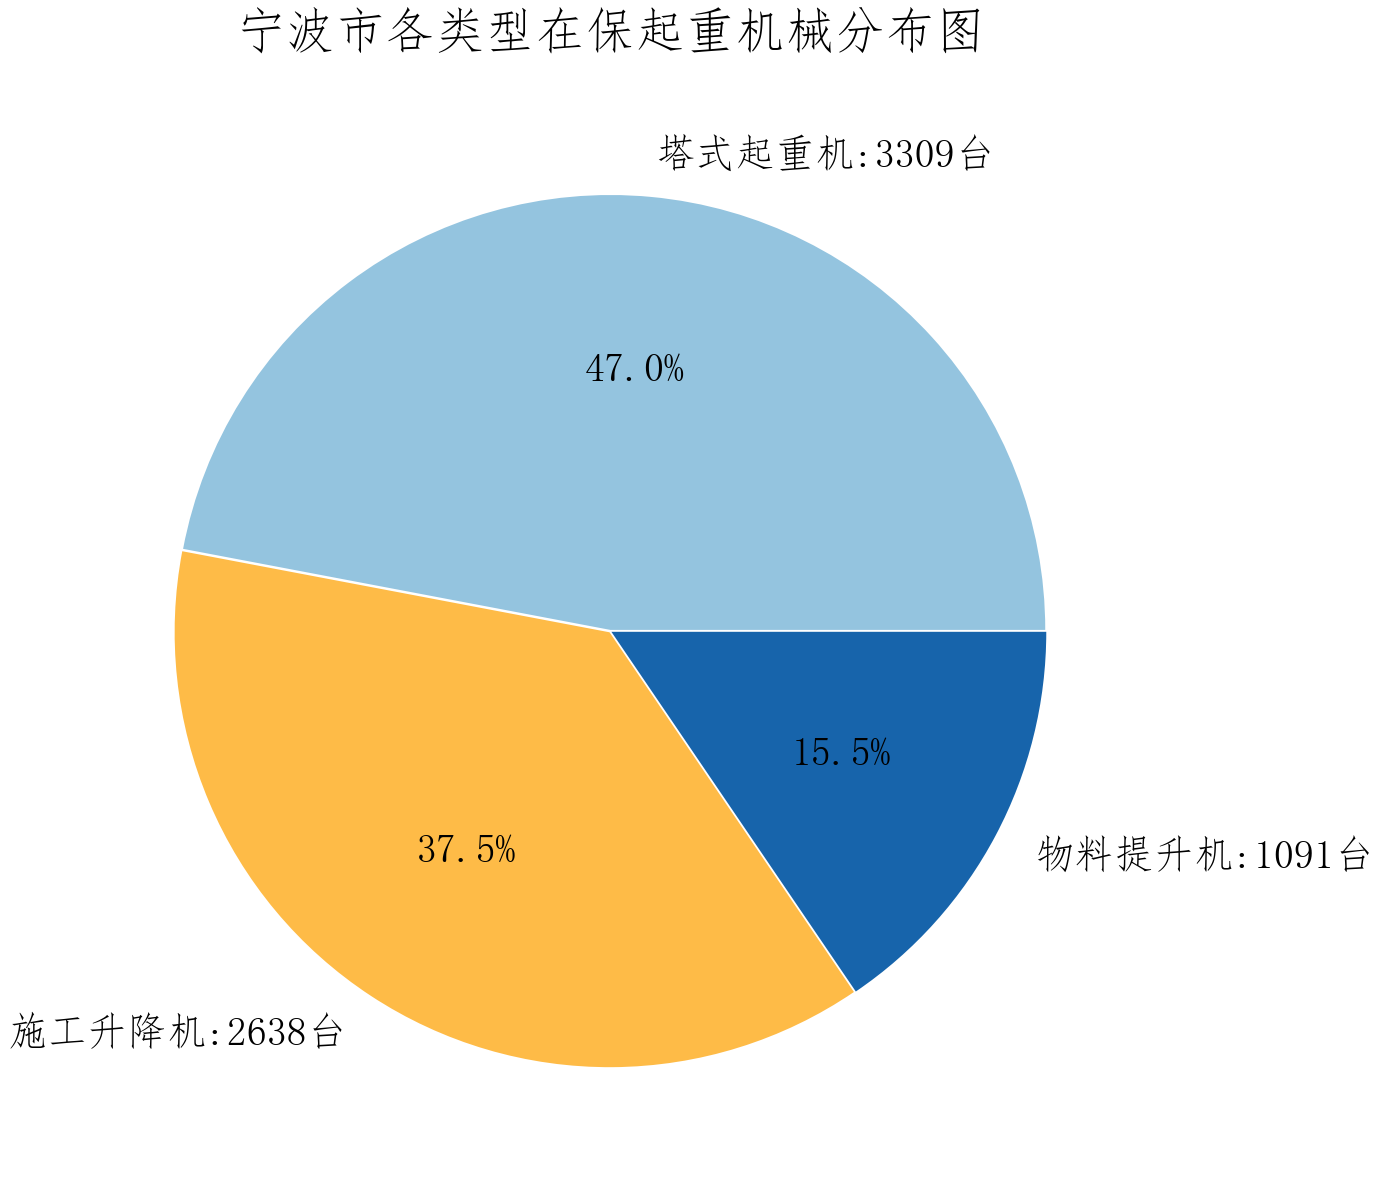

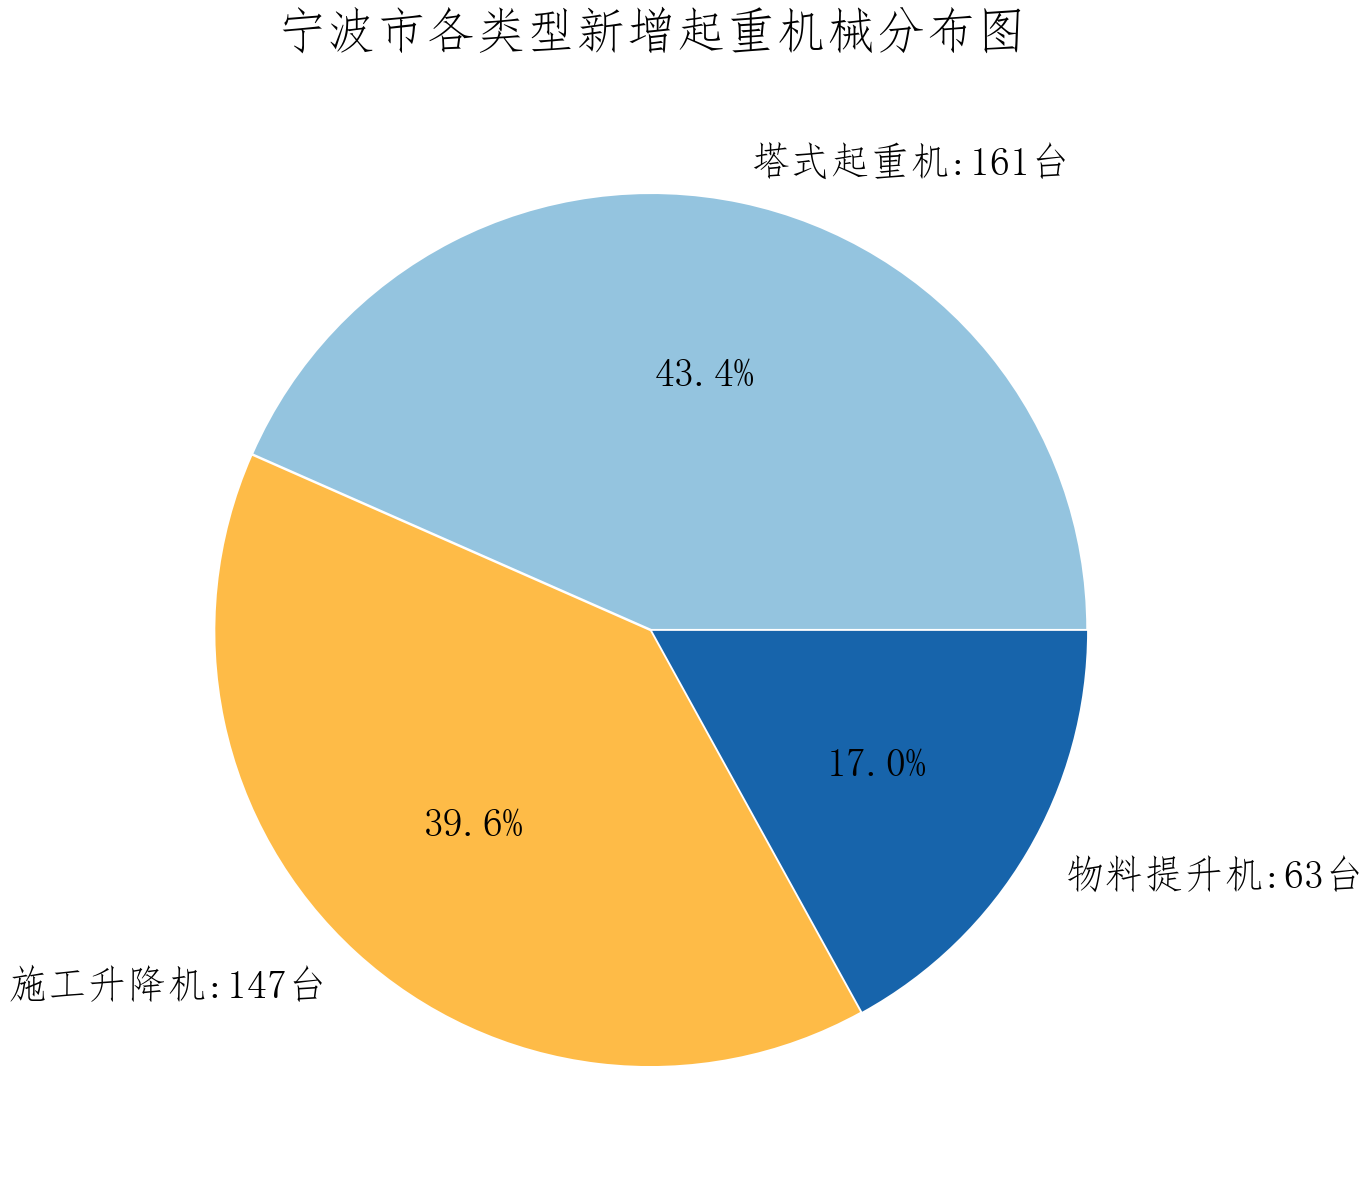

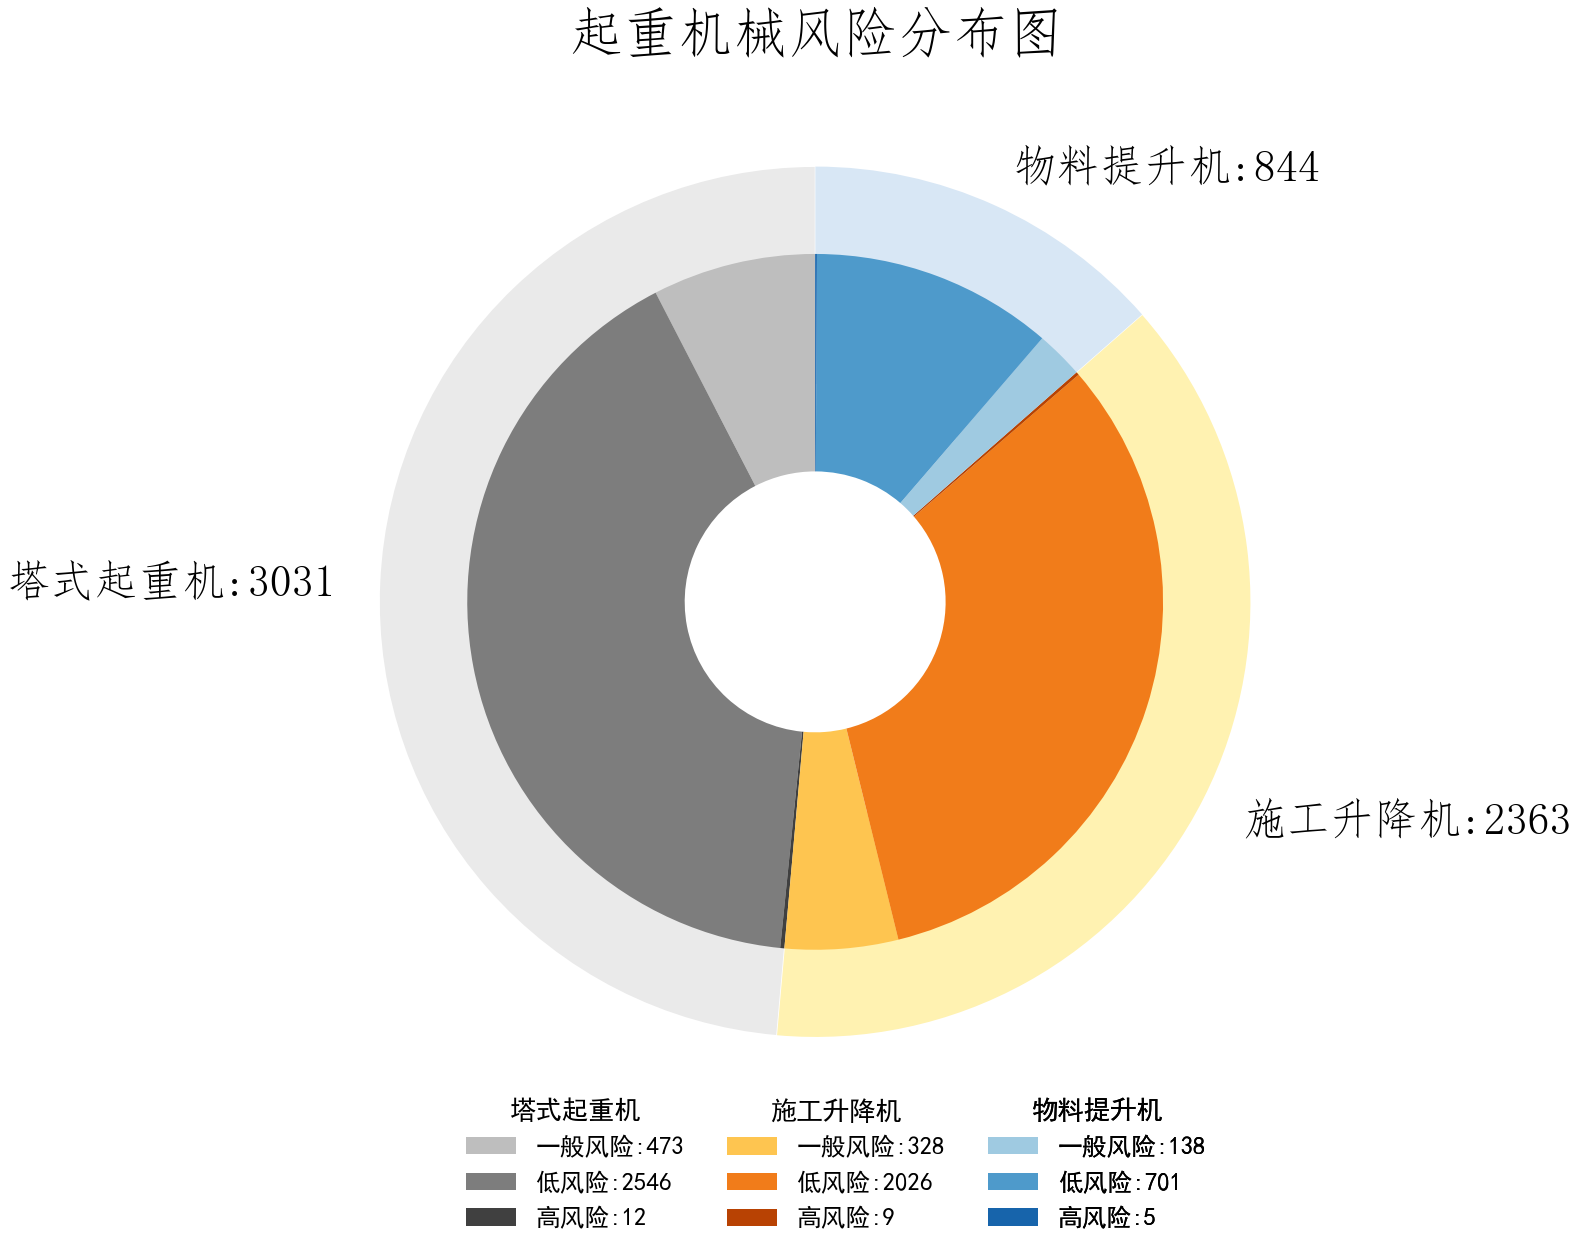

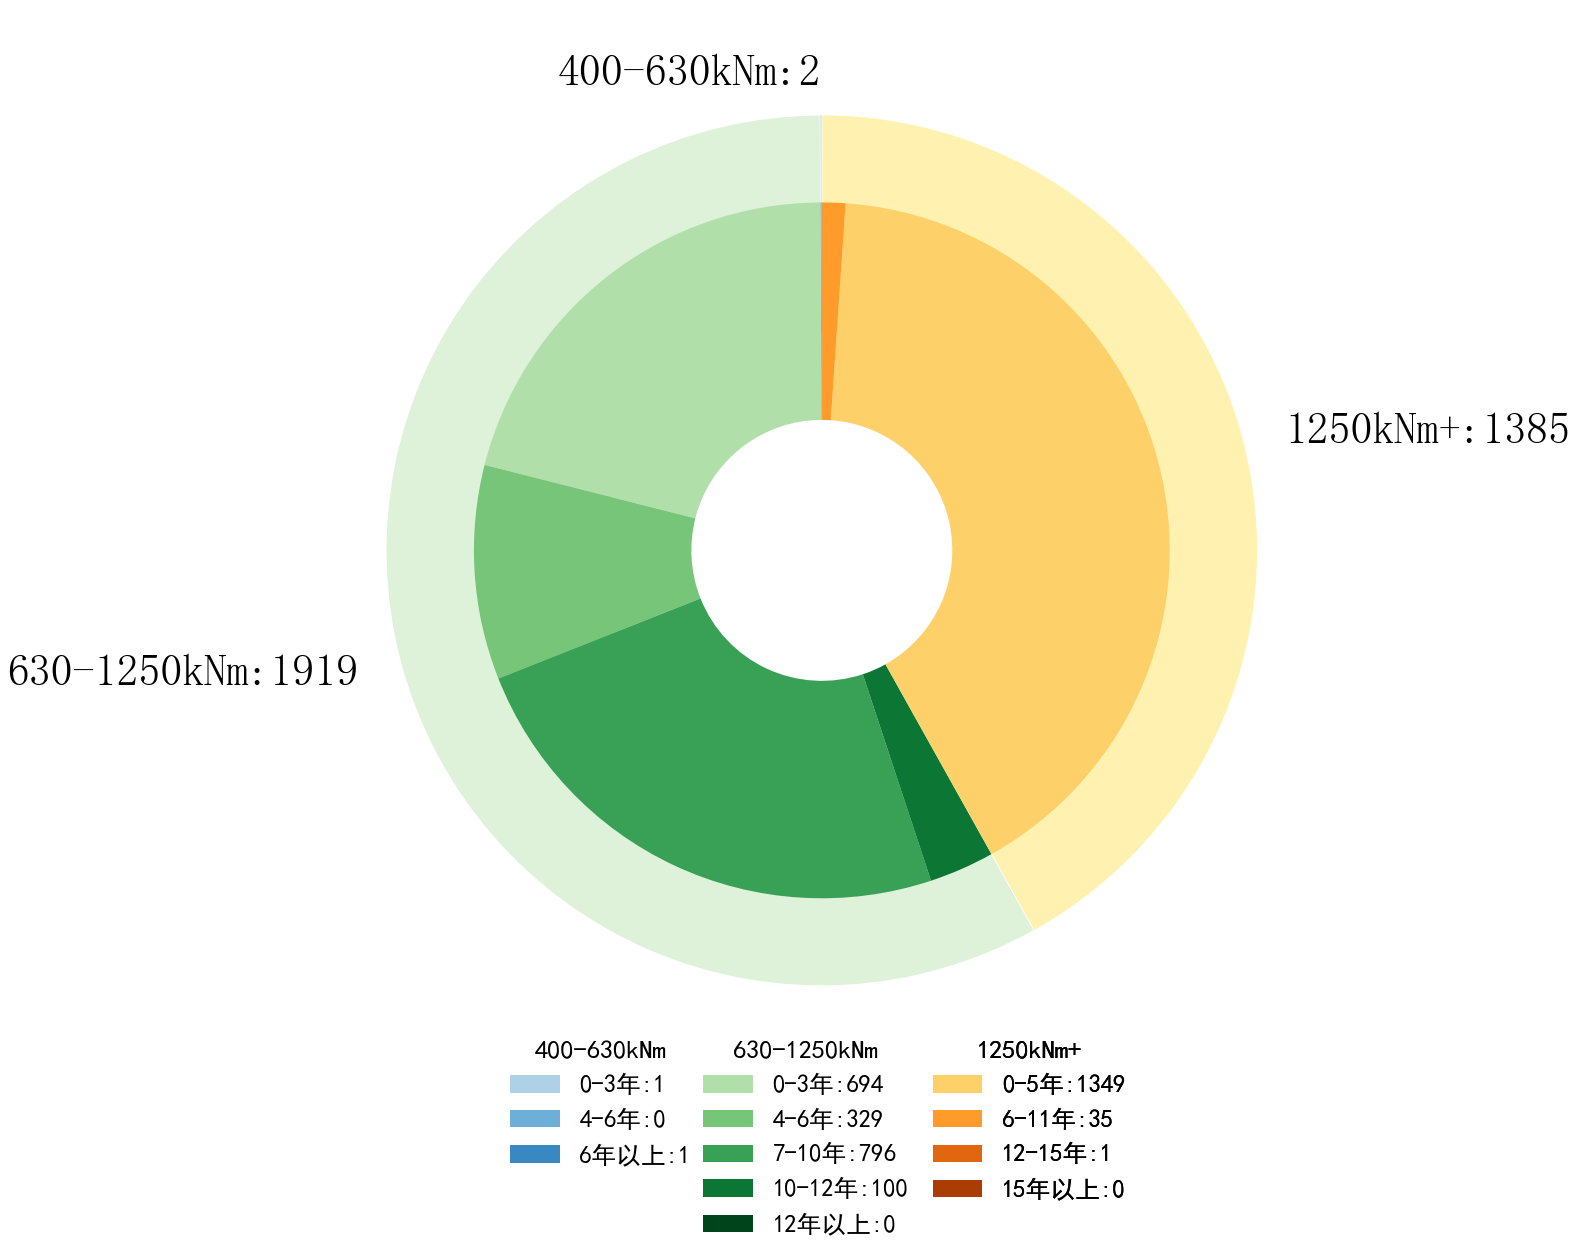

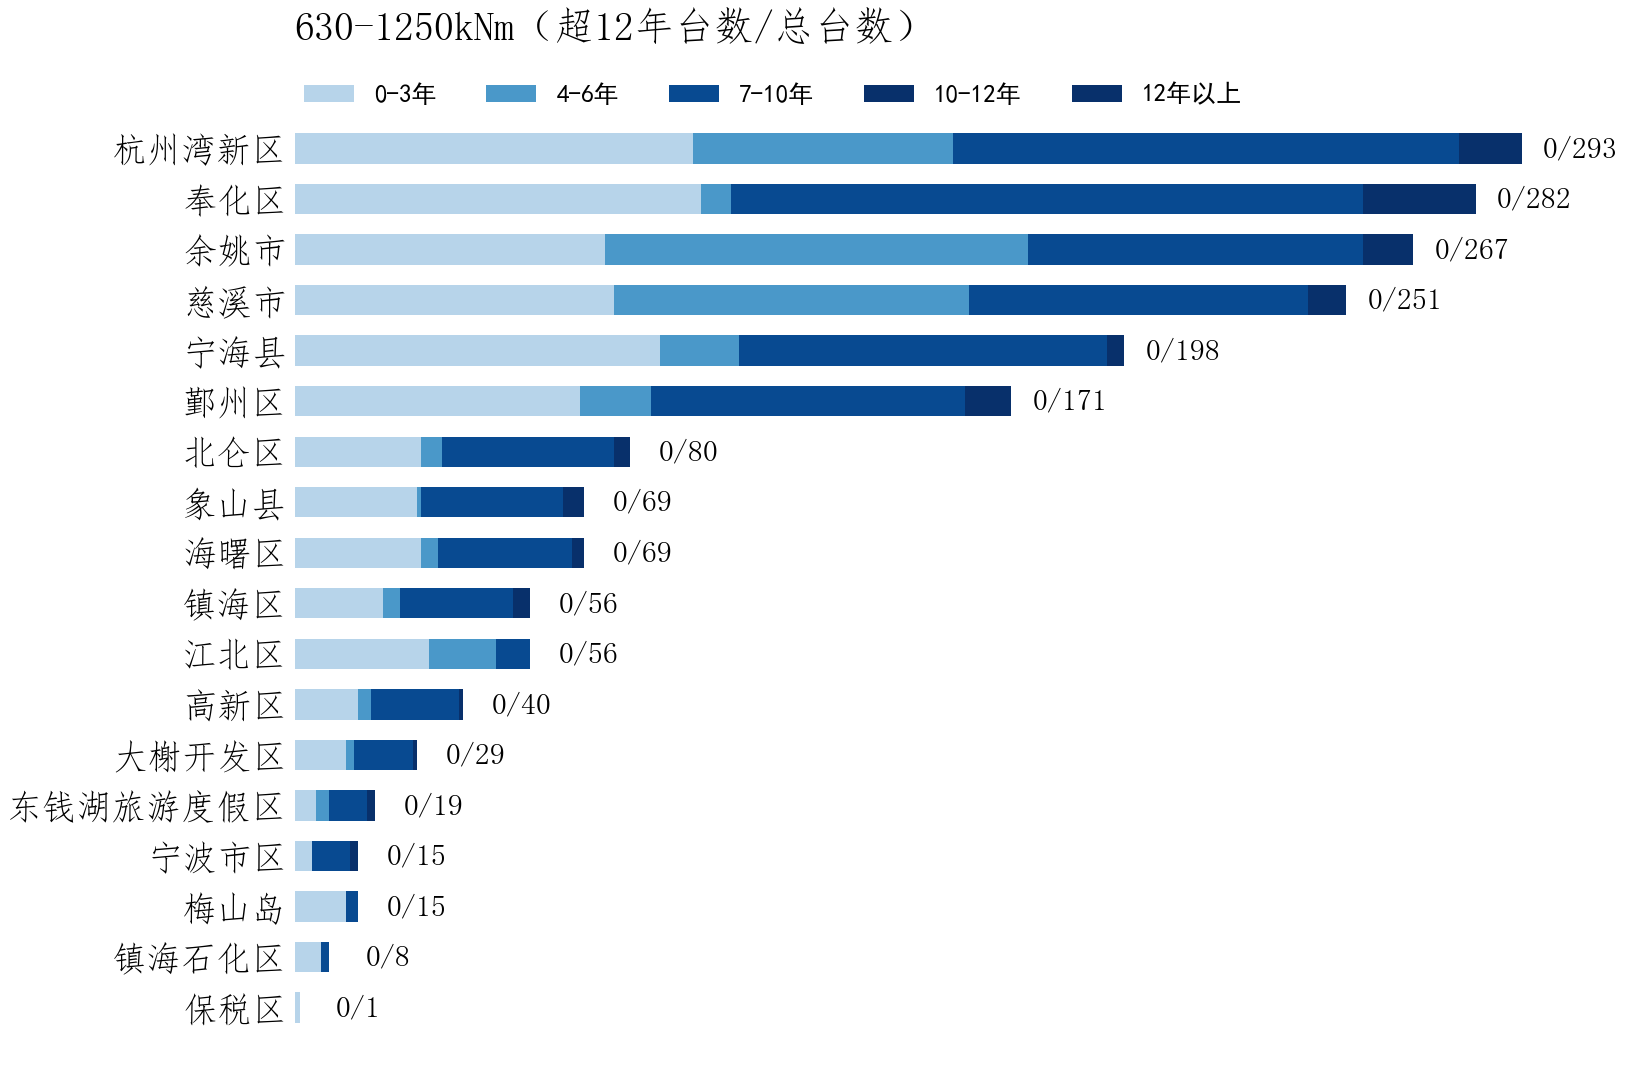

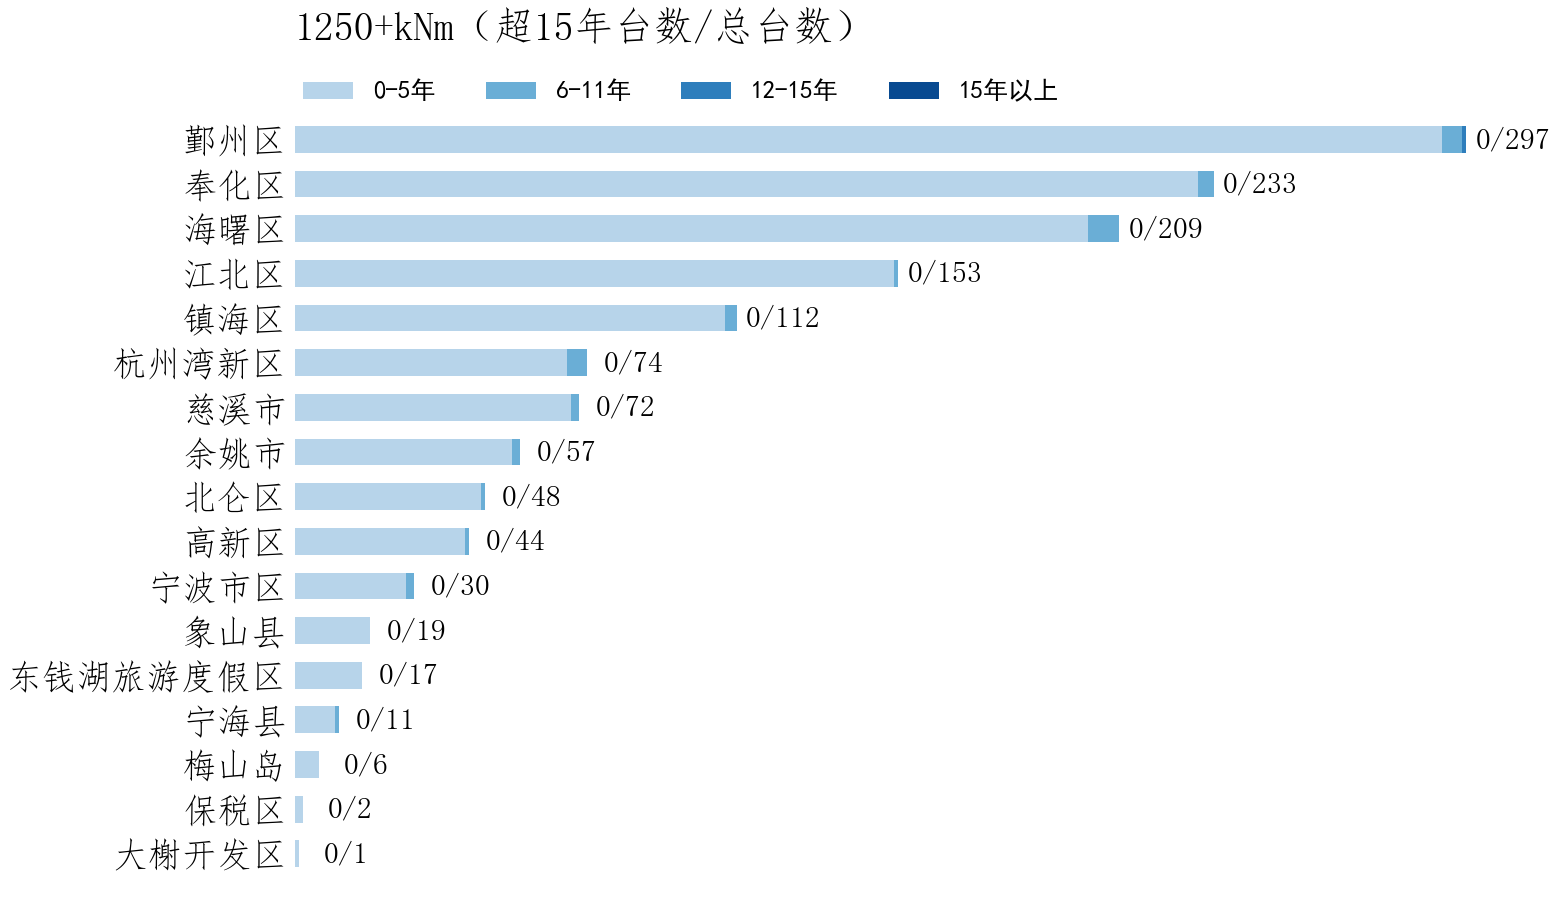

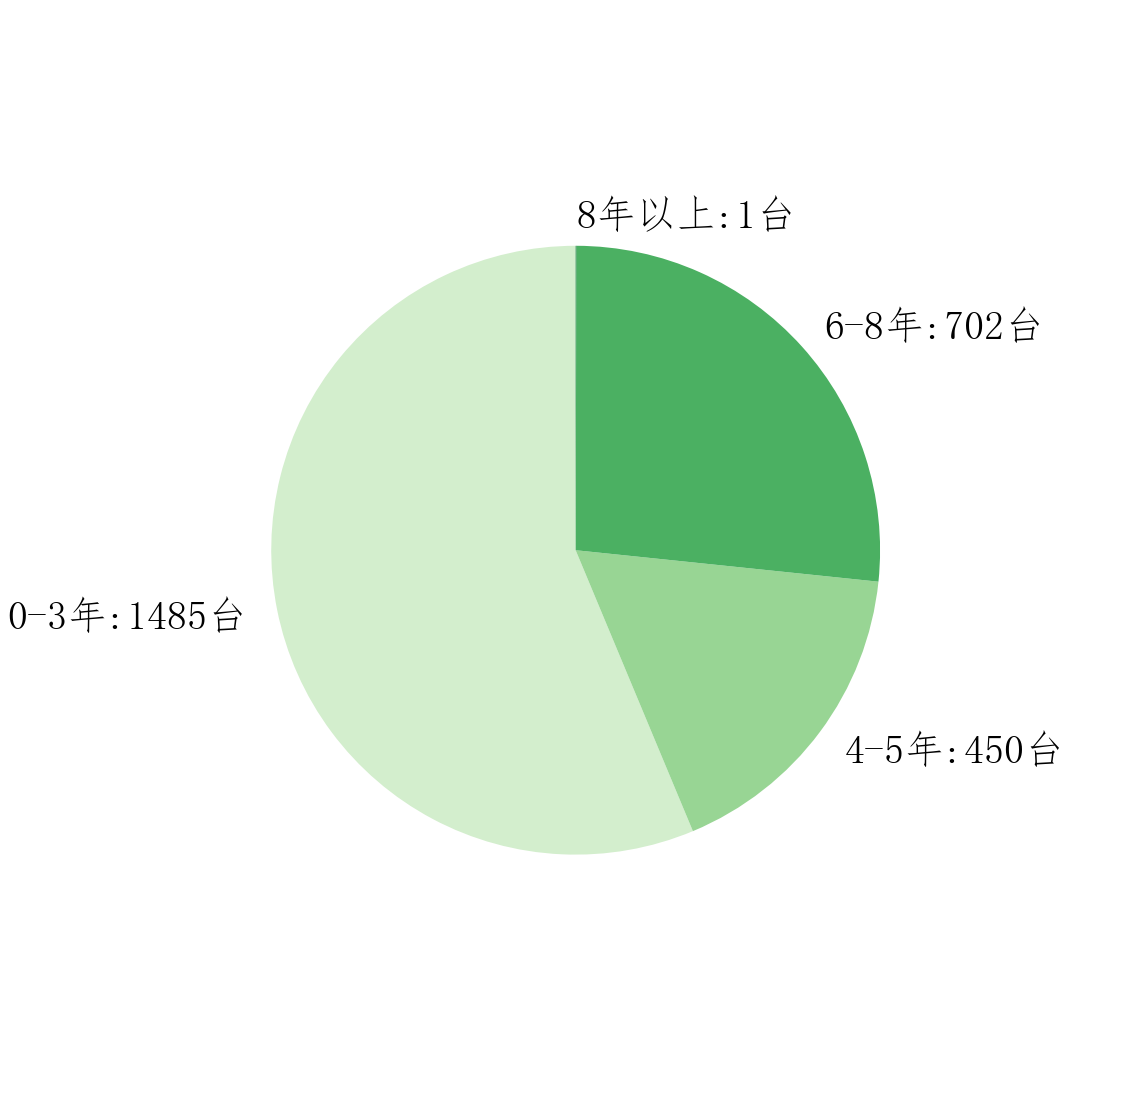

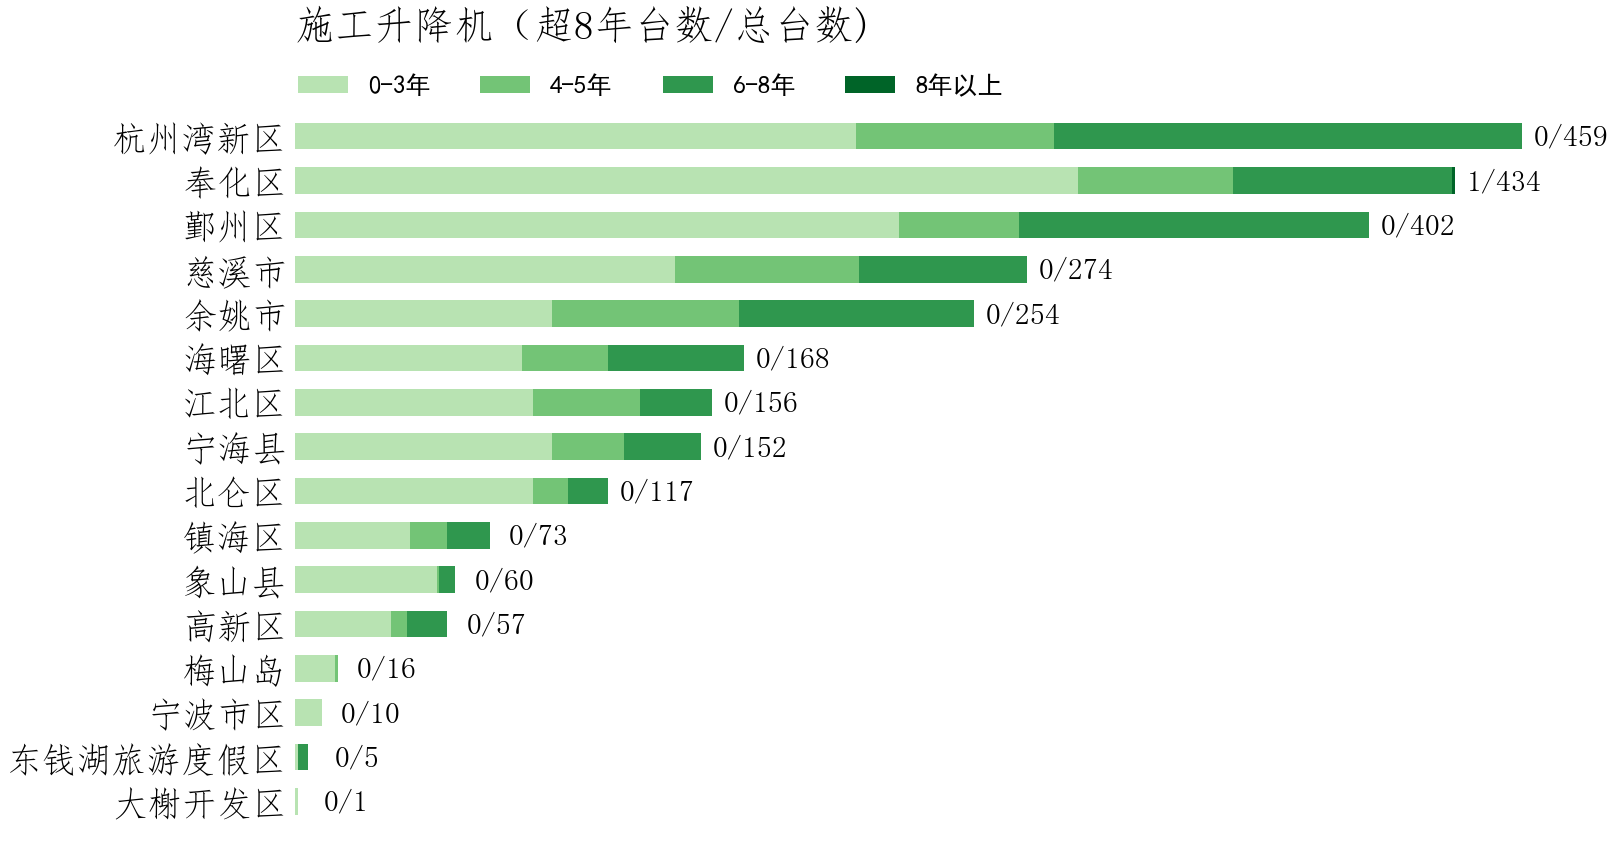

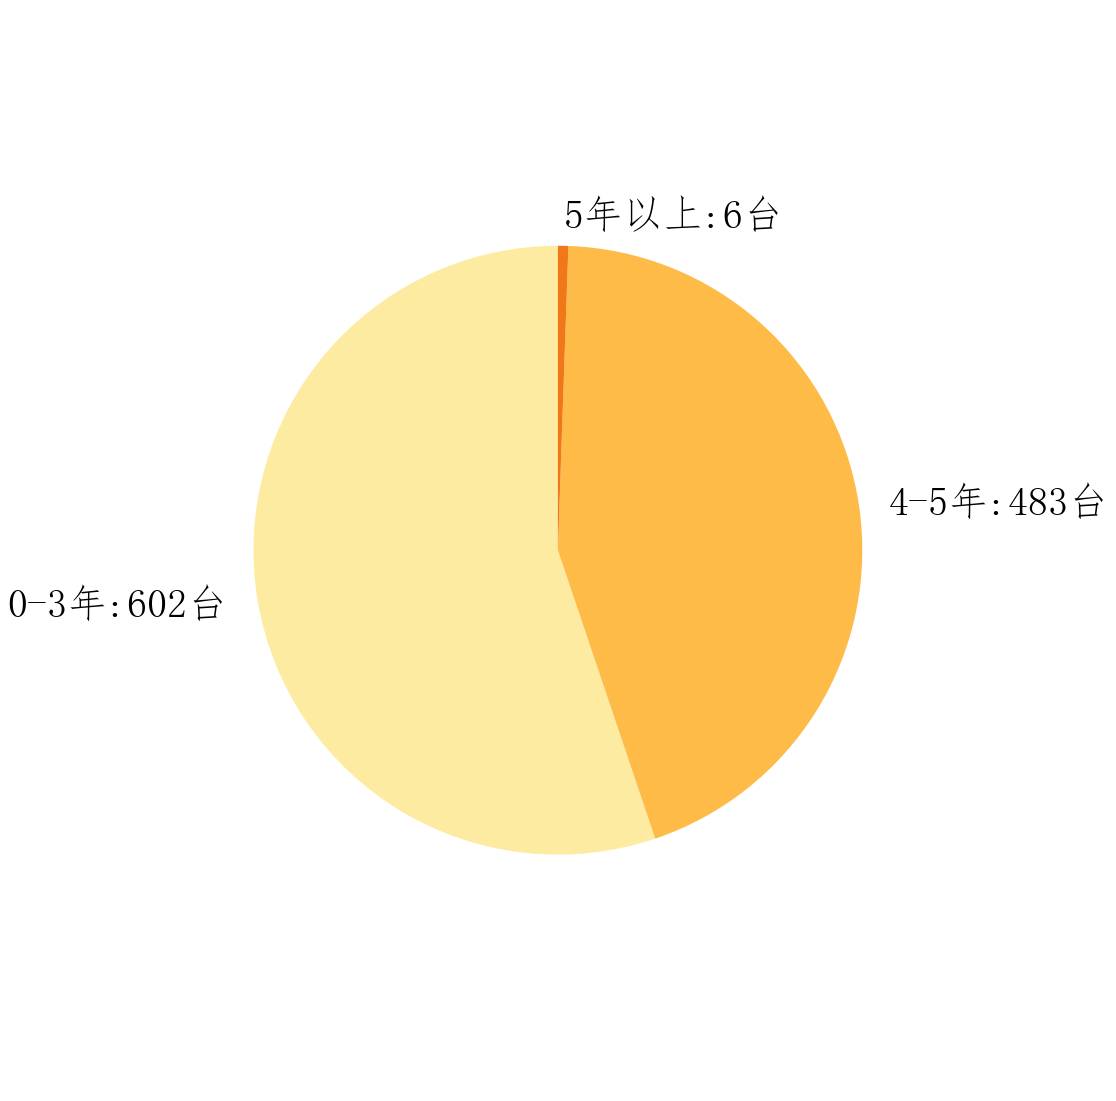

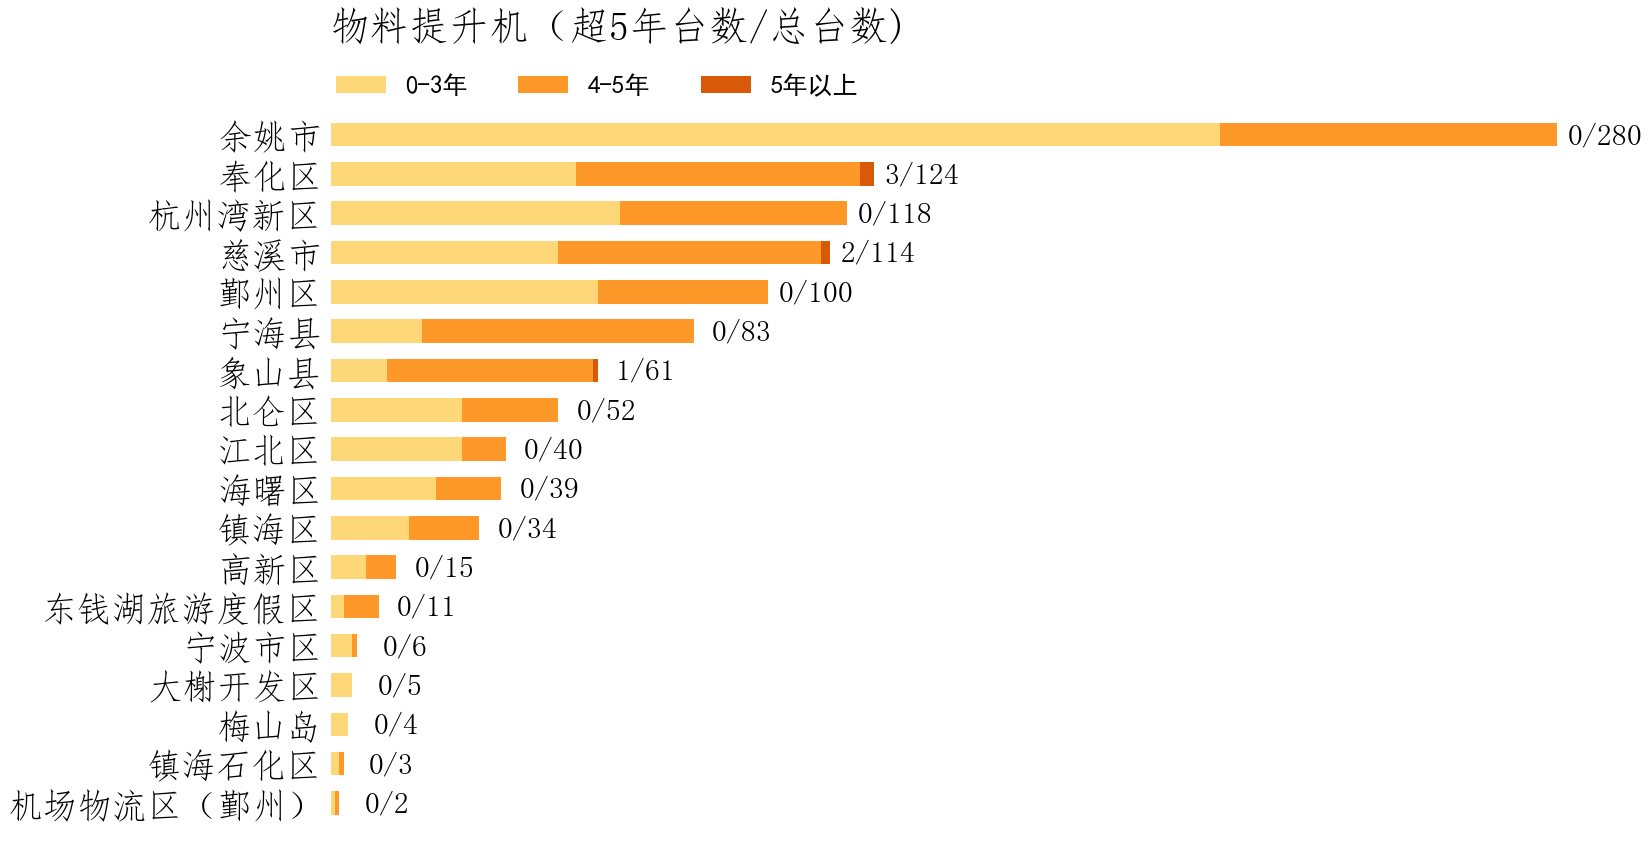

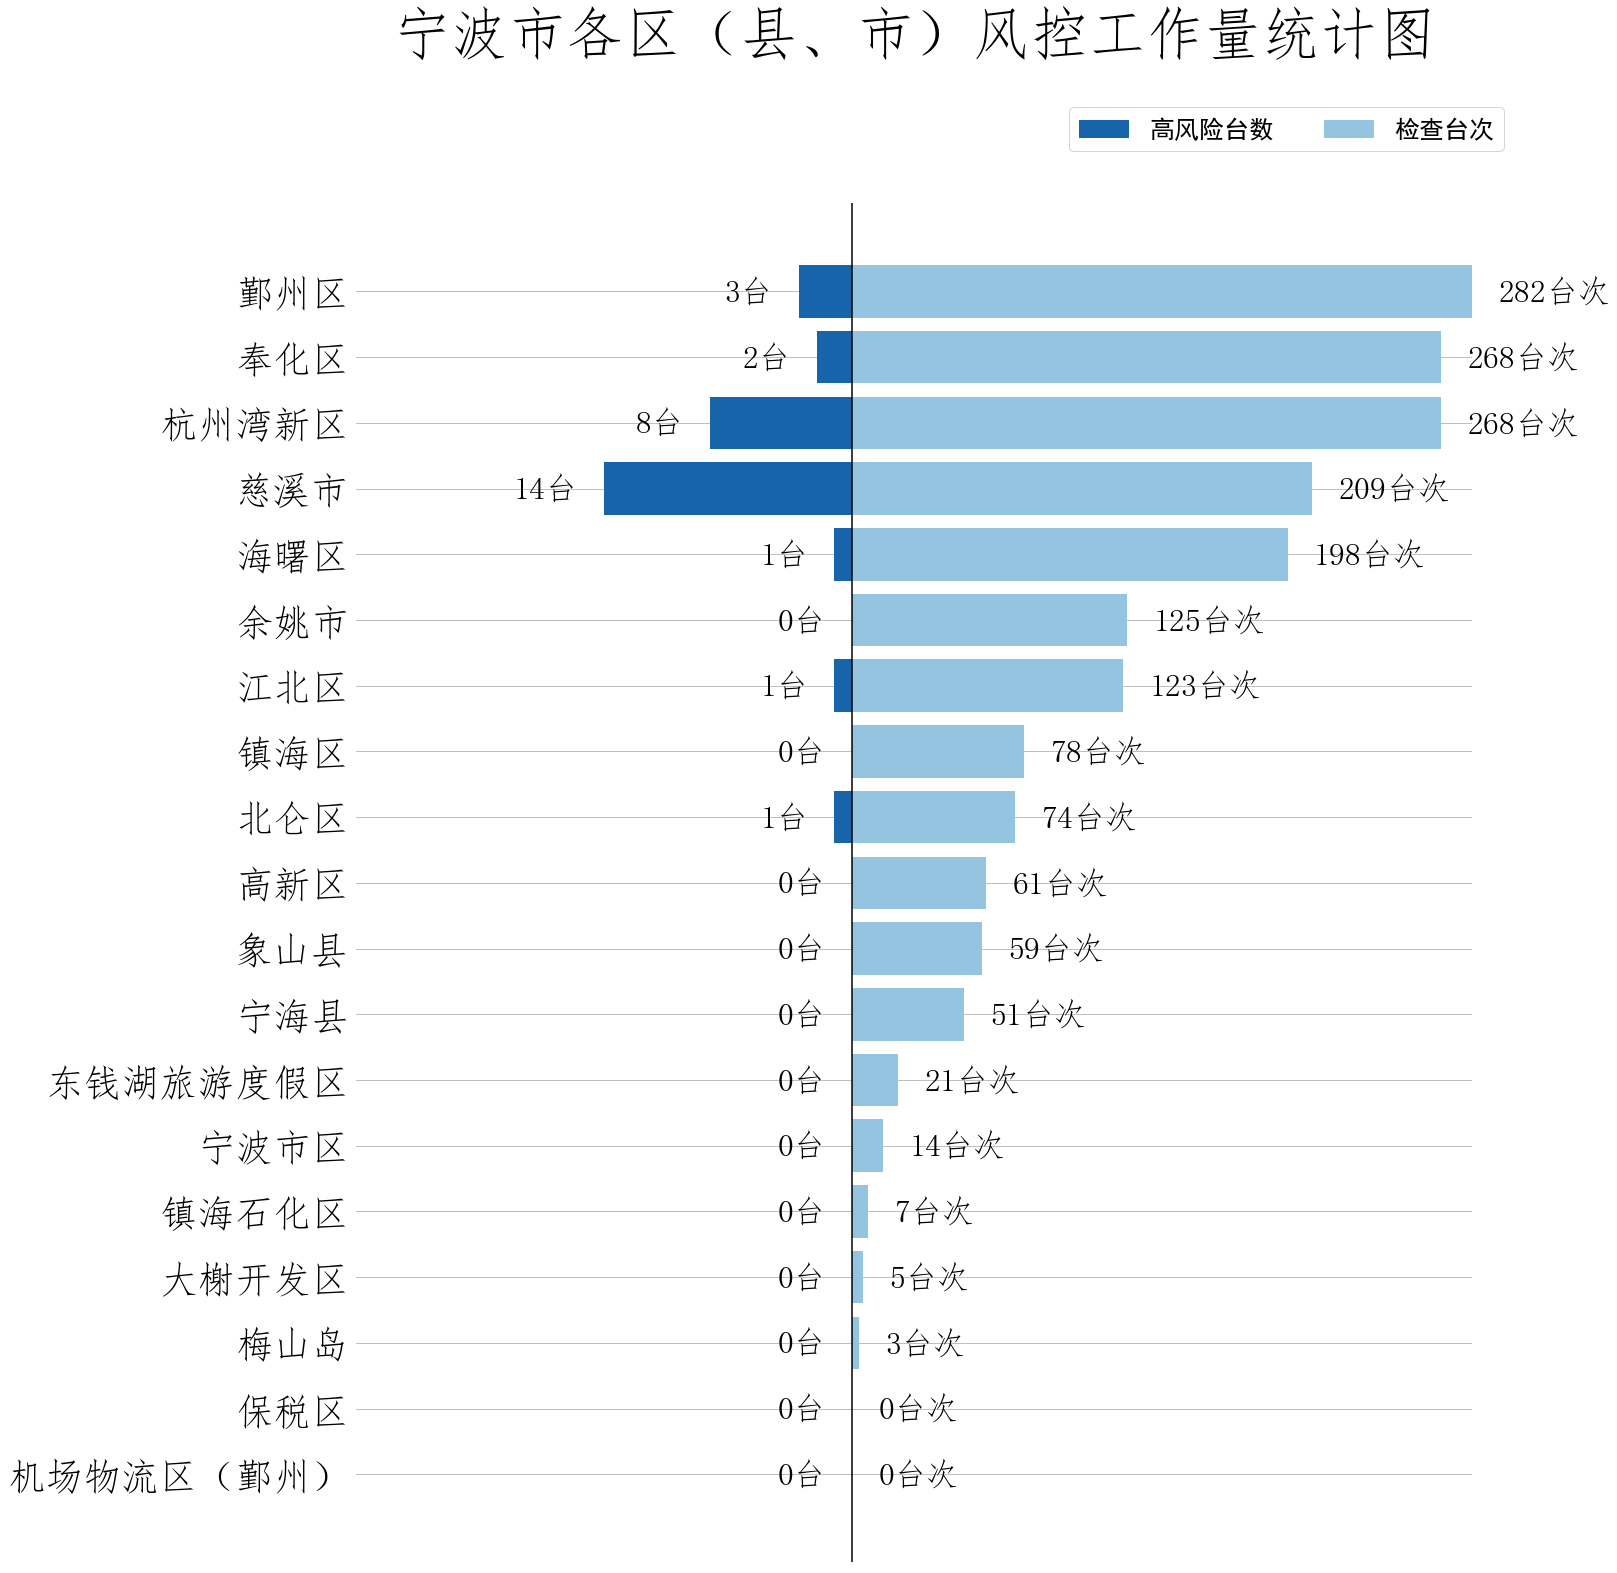

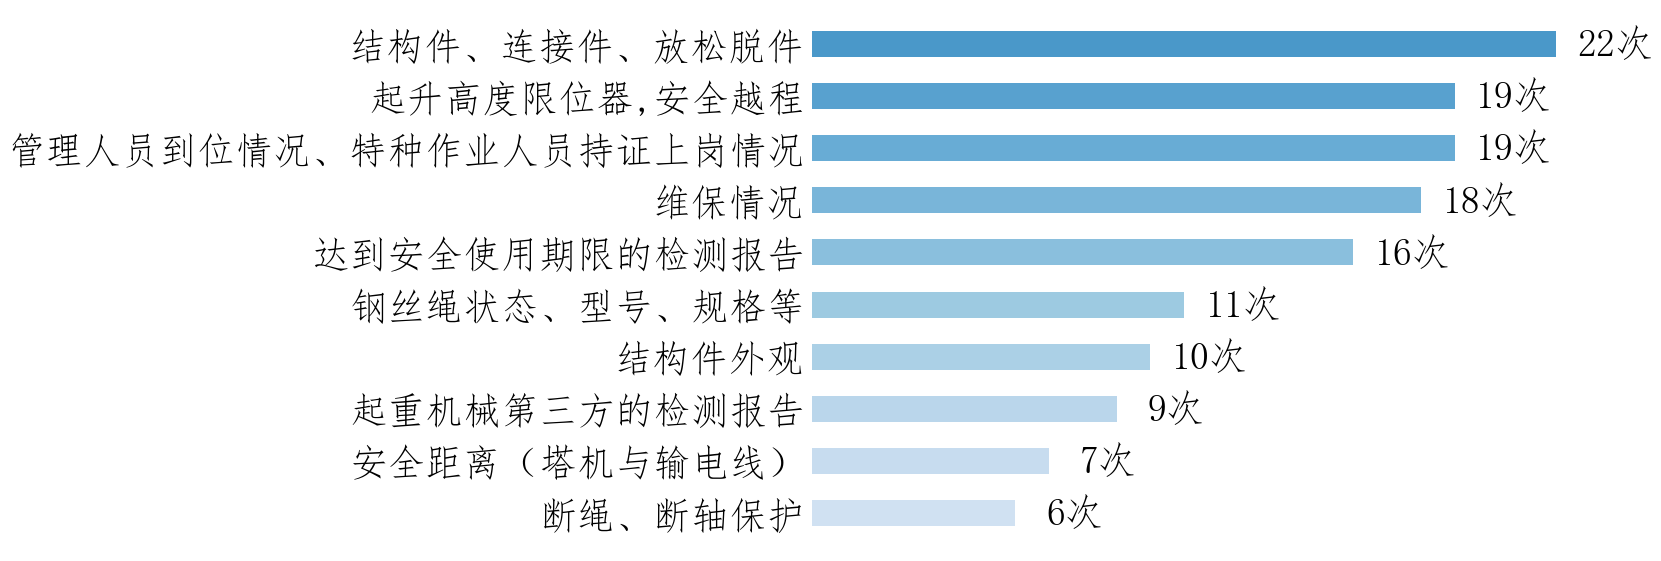

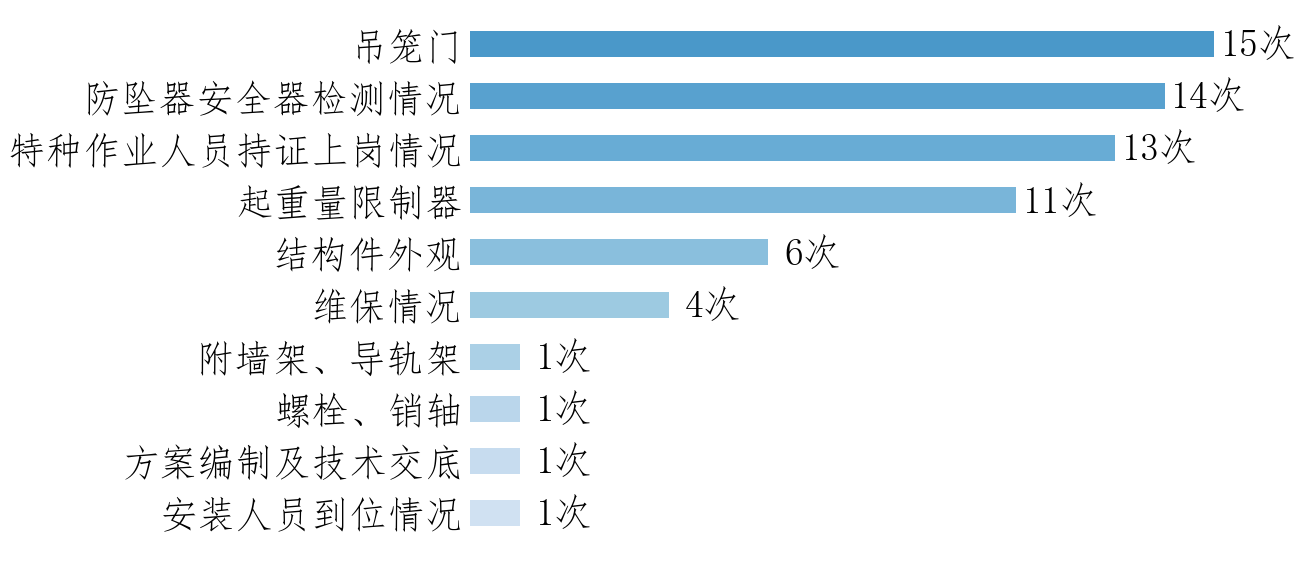

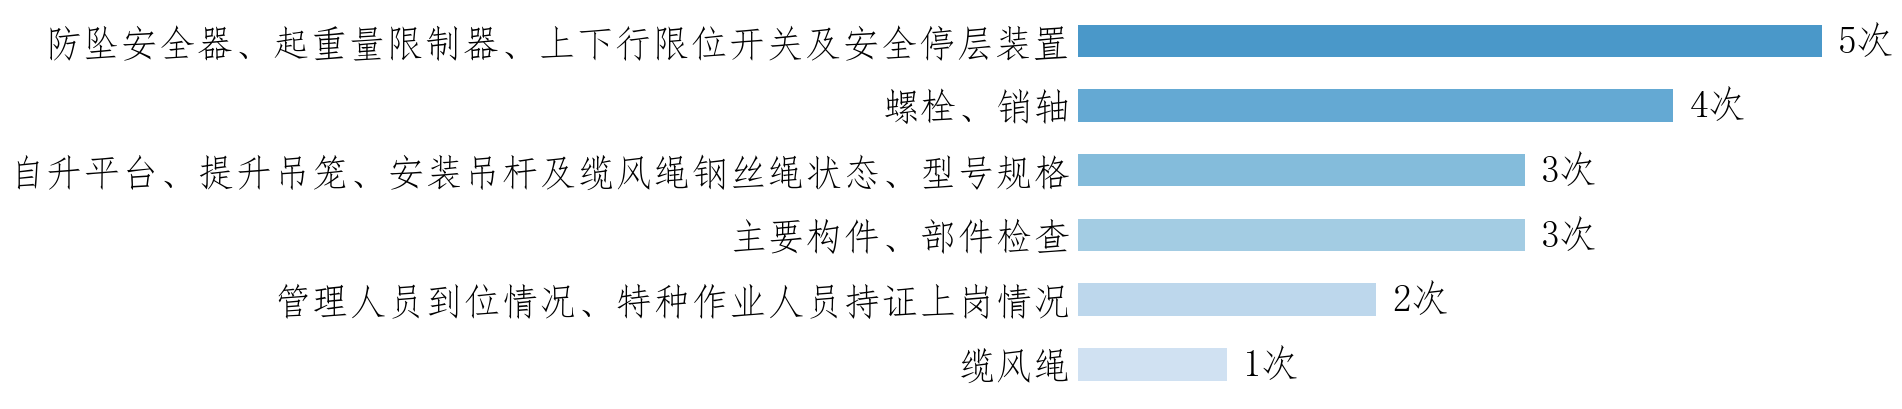

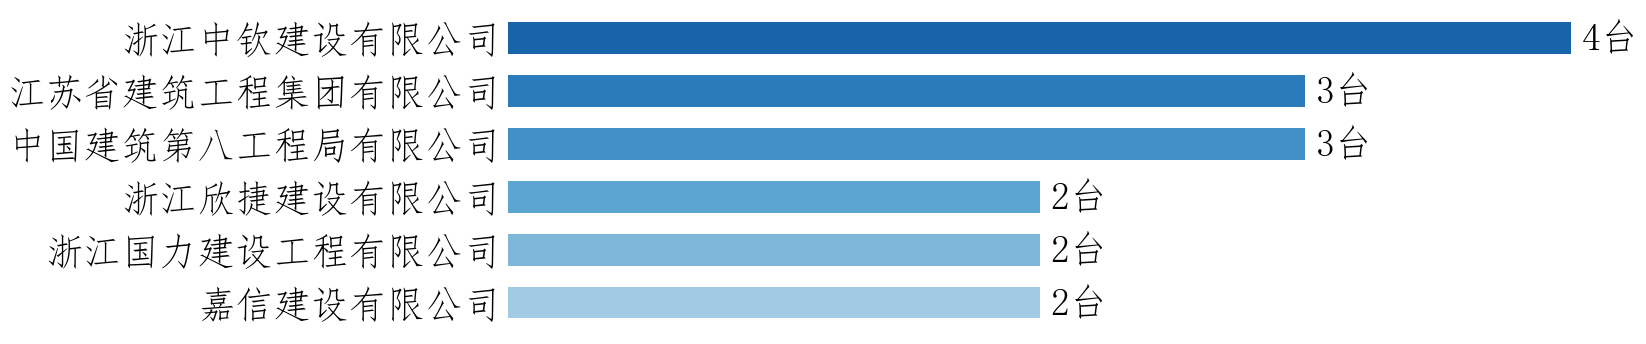

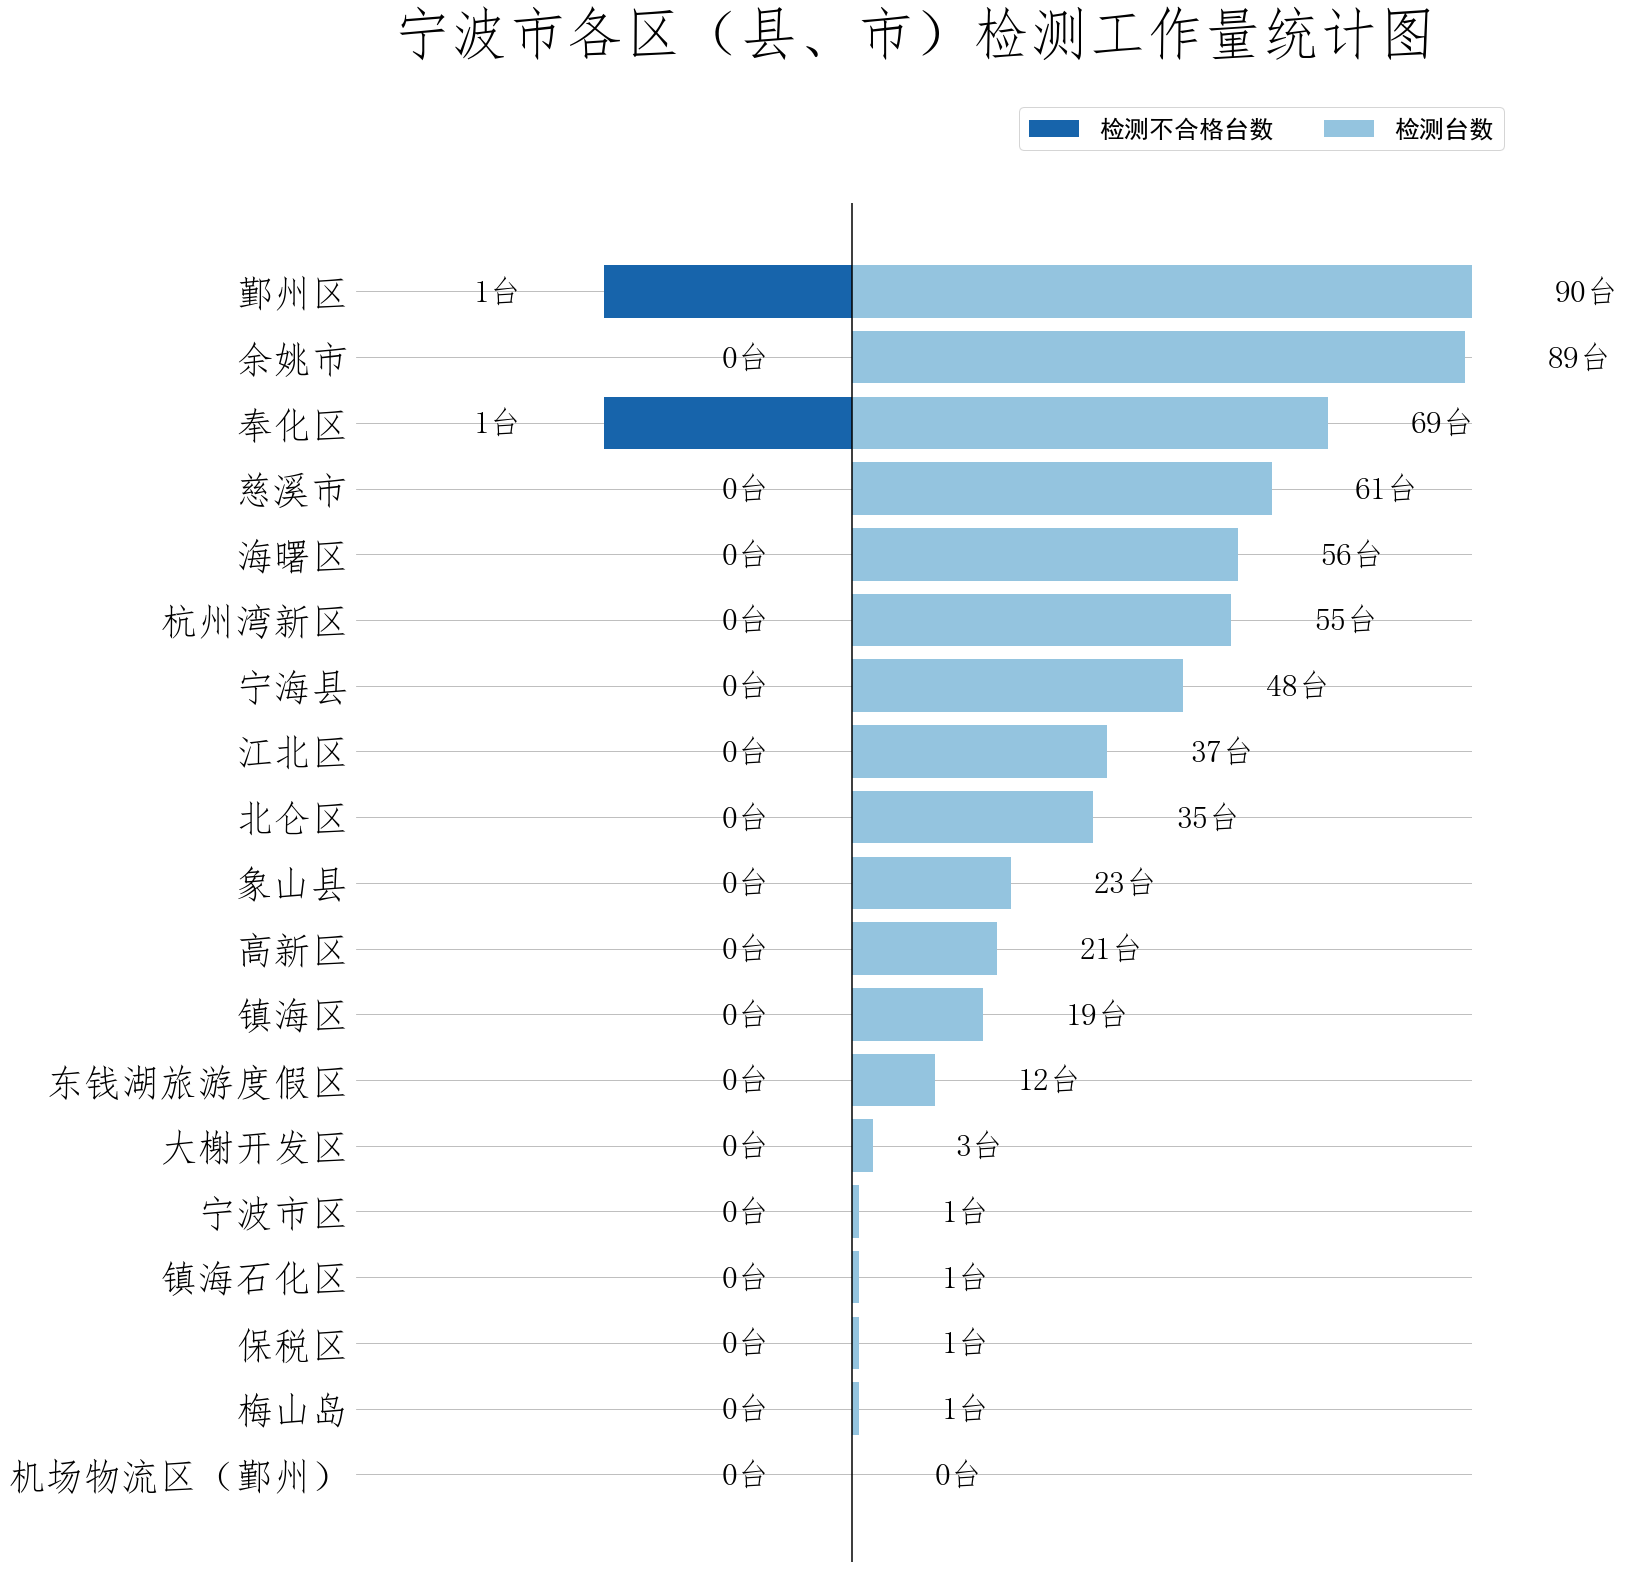

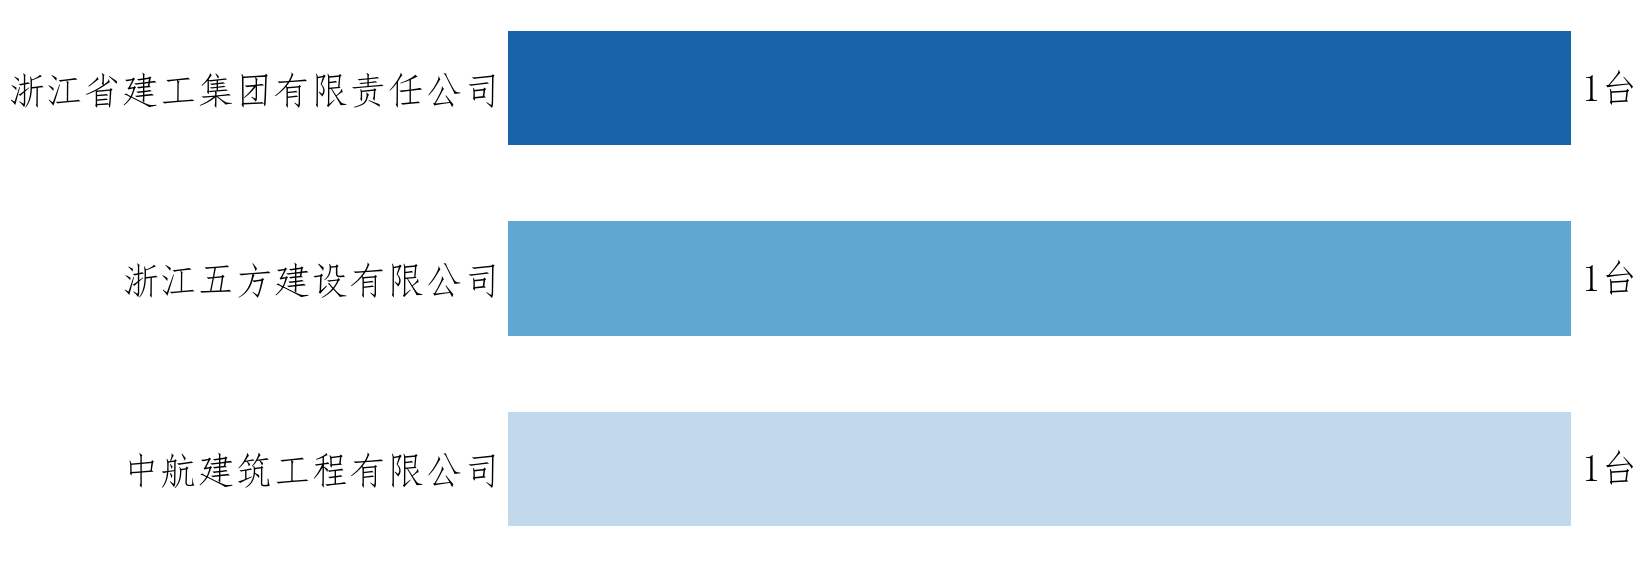

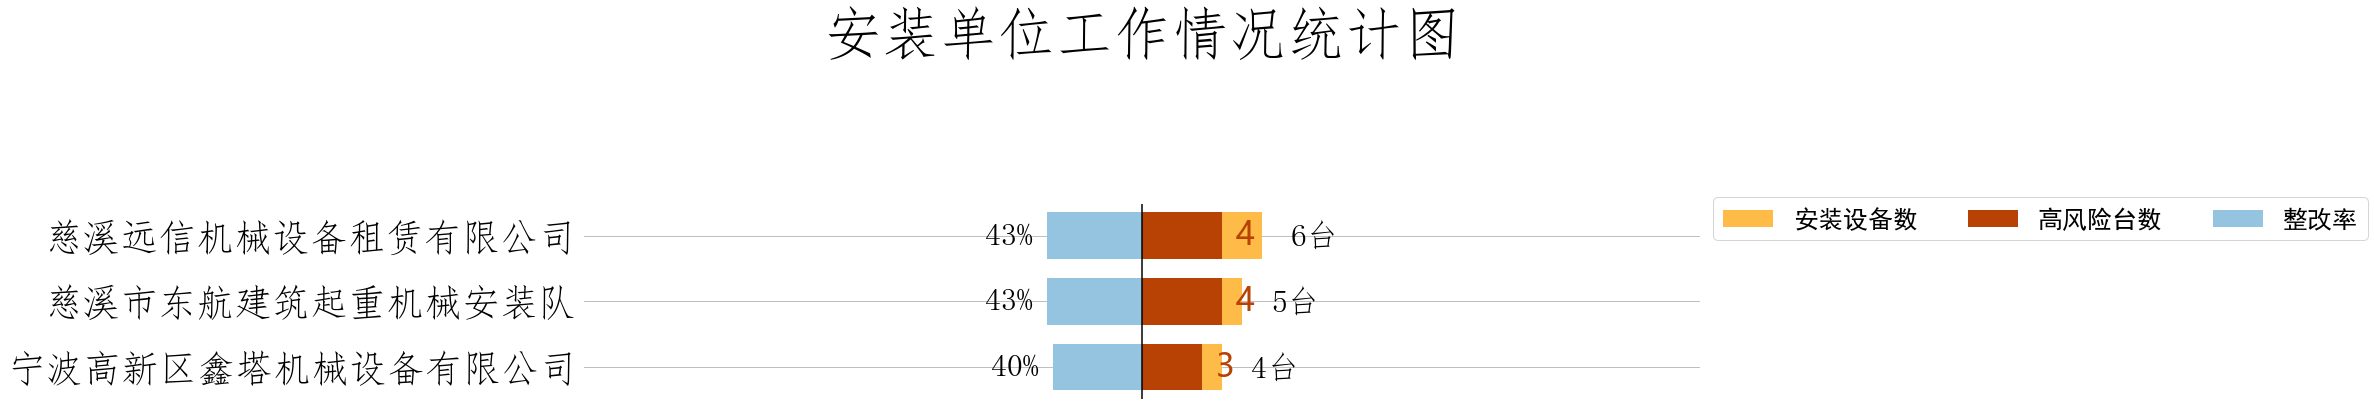

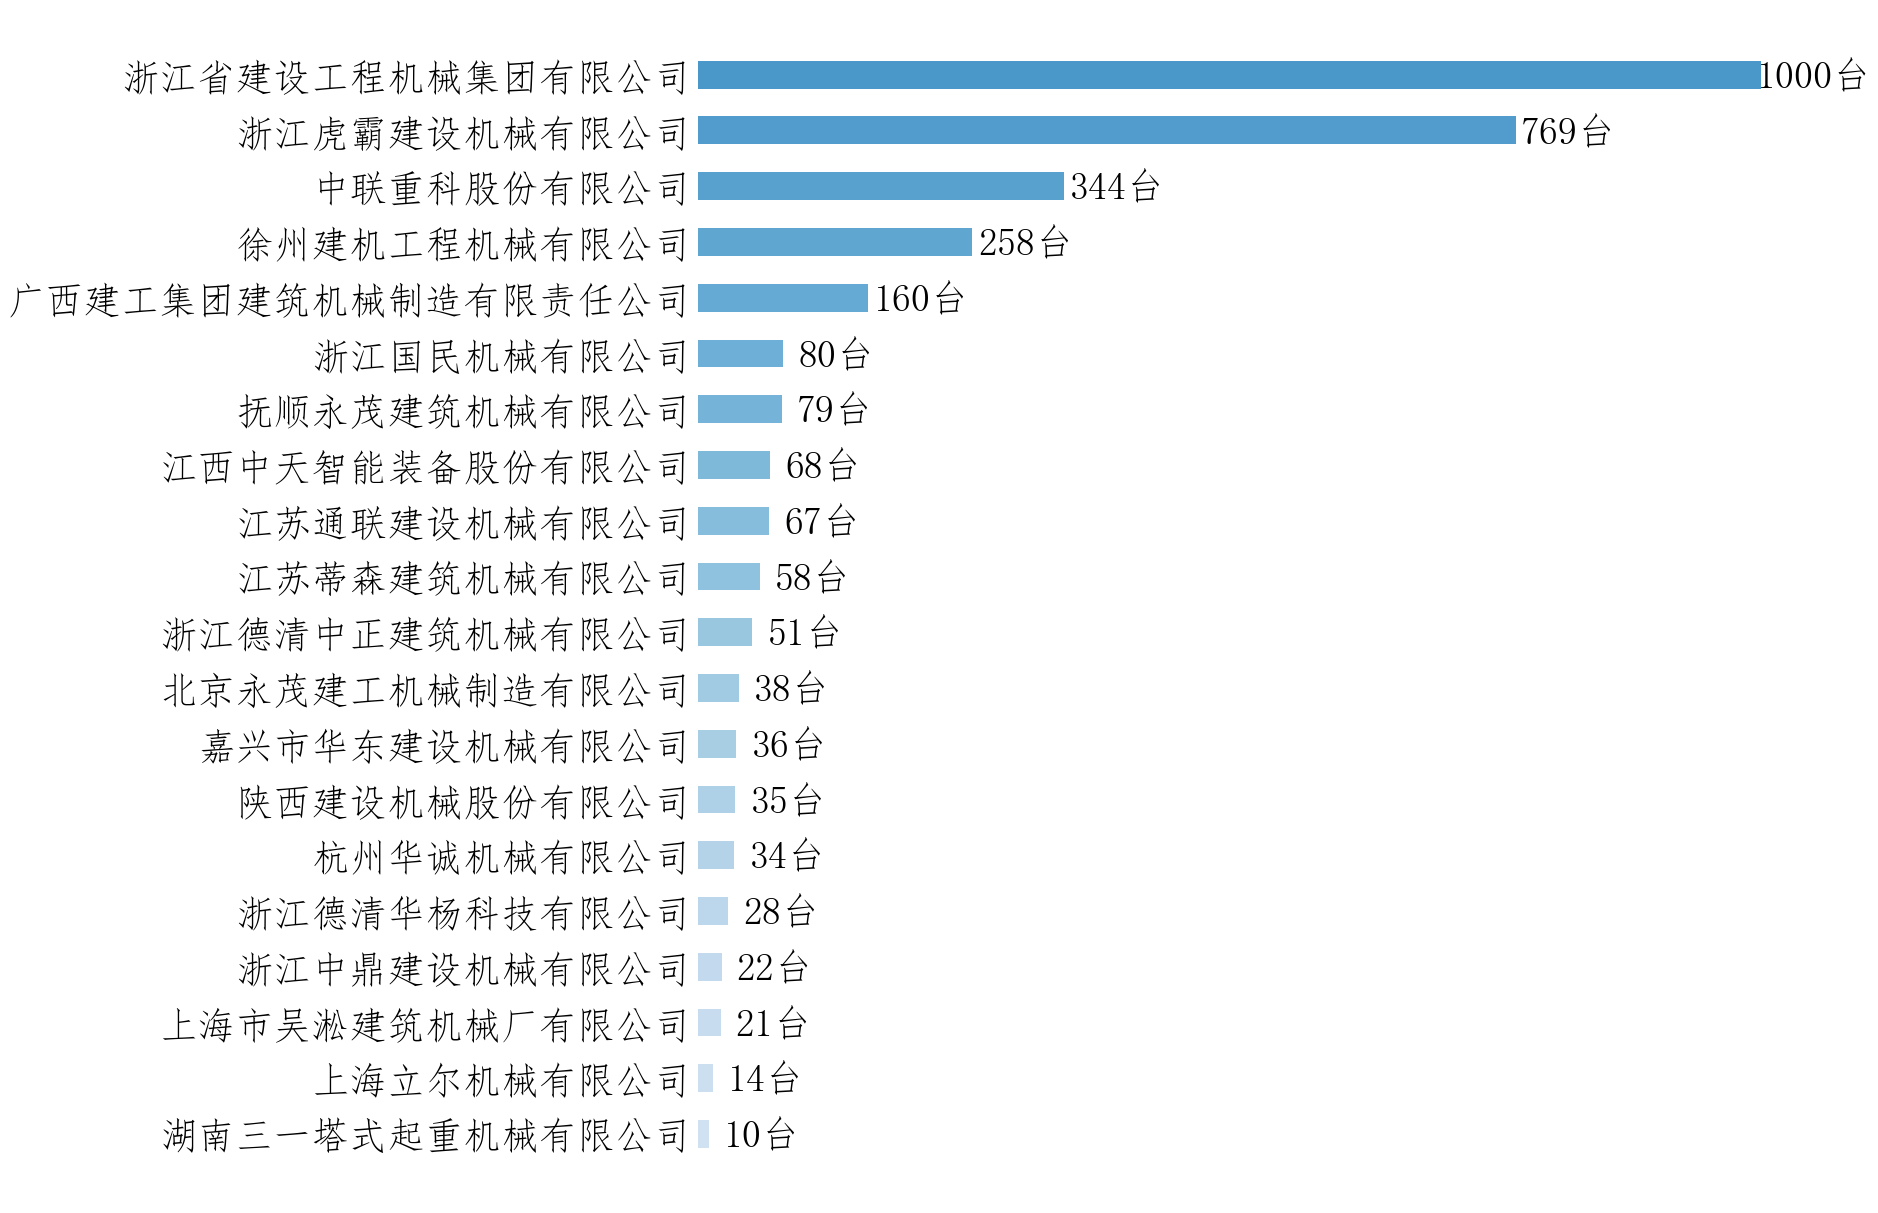

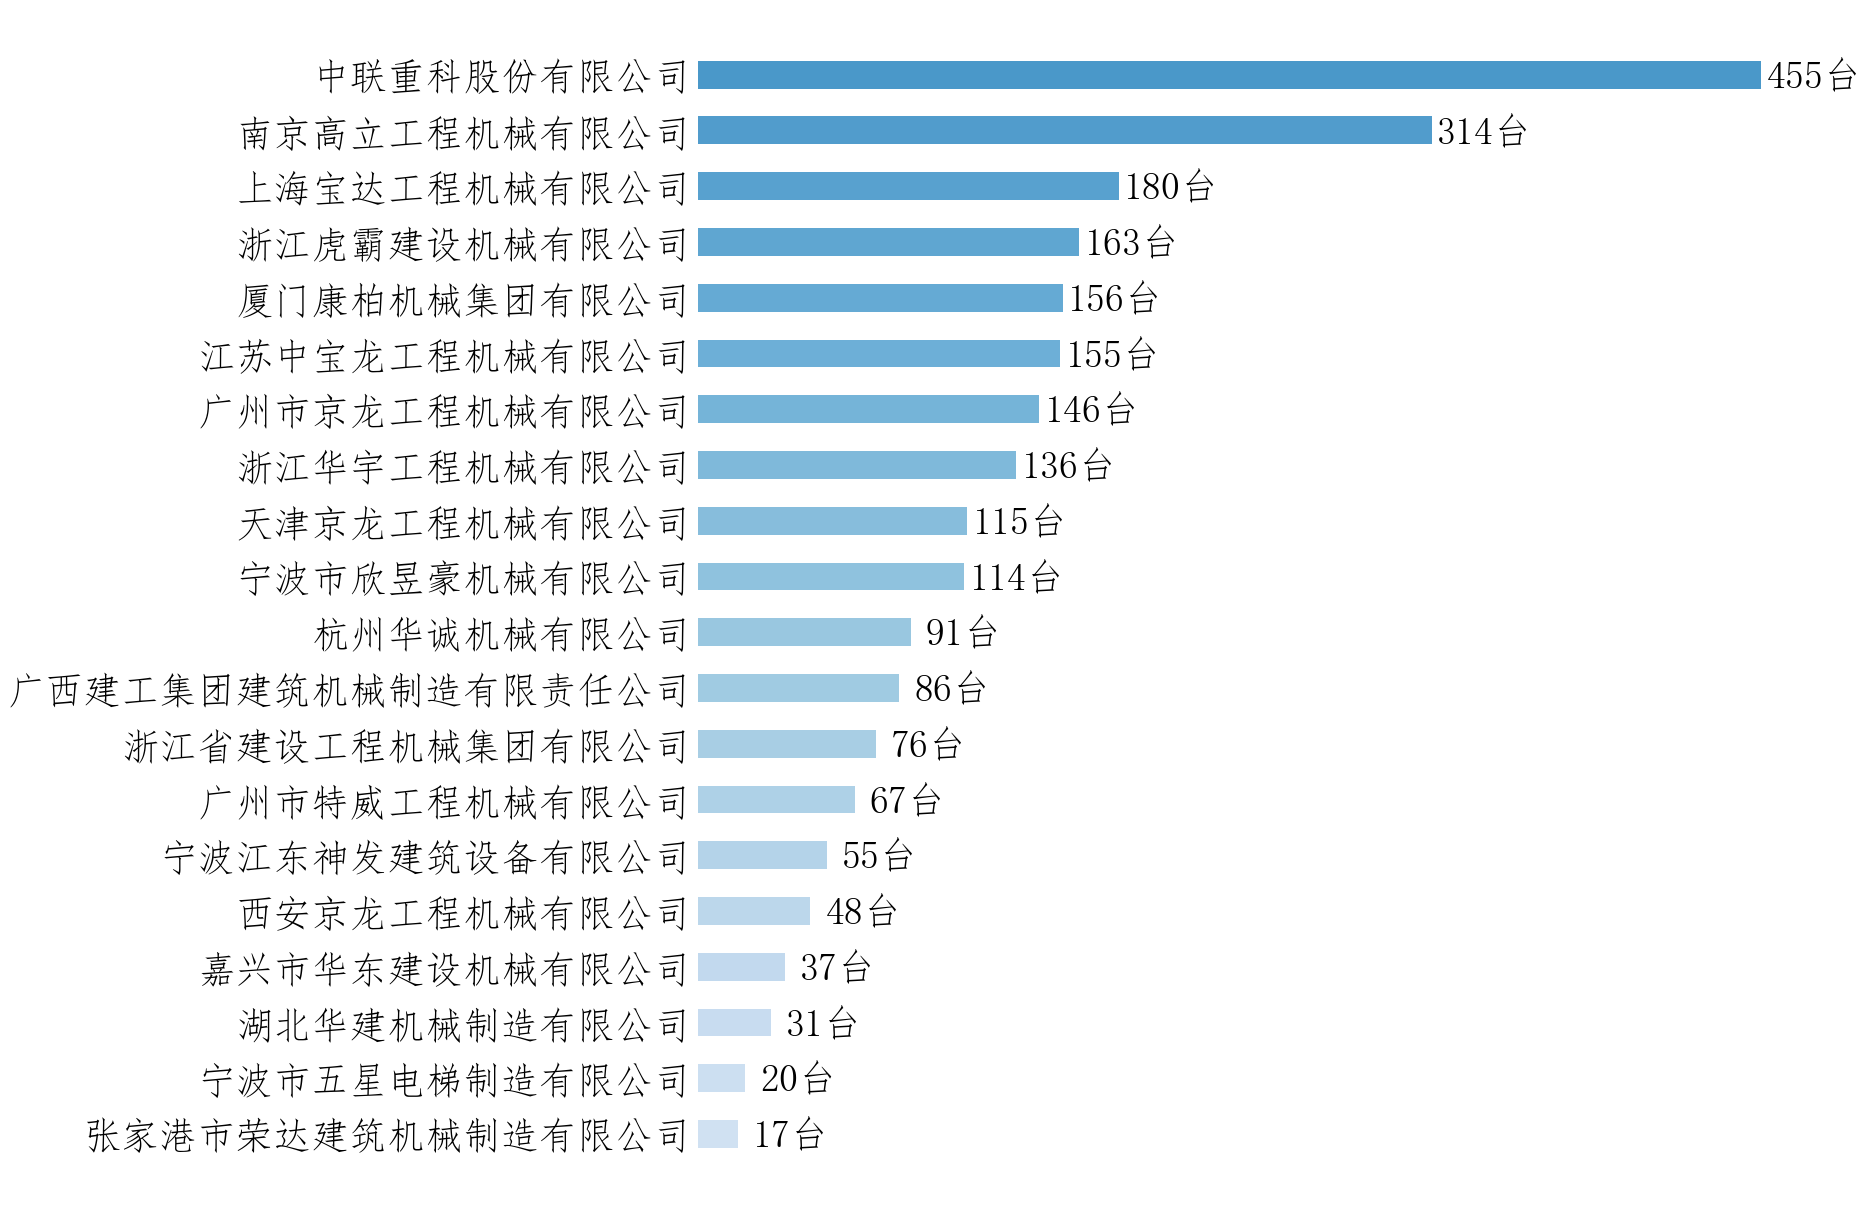

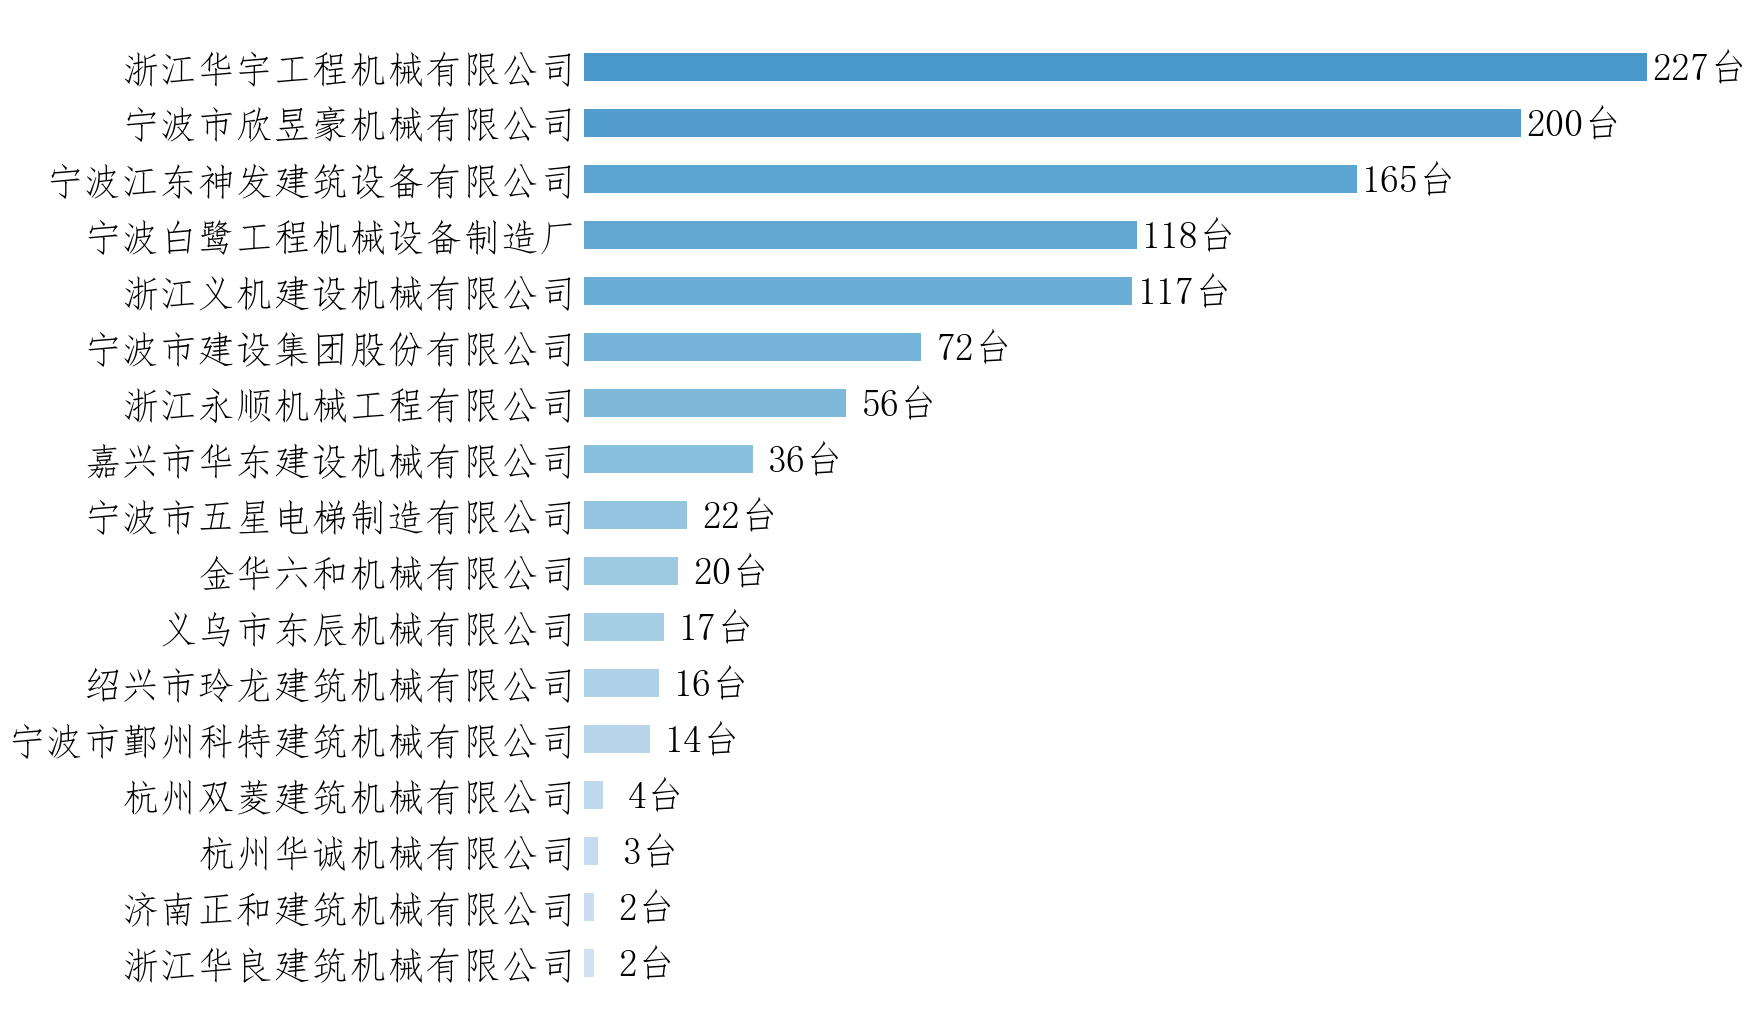

完成画图，用时21.67秒，开始生成报告...
报告生成完毕，用时65.06秒，报告已保存在C:\Users\sherr\Sherry\Qizhongji\AutoReport\月报路径下！


In [5]:
#画图
End_Date=End_Date2
# Generate Graph and Tables
print(f'数据表生成完成,用时{round(time1,2)}秒，开始画图...')
承保情况='  截至{}年{}月{}日，{}在建项目共 {} 个，在保施工总承保企业共 {} 家，\
在用设备数共 {} 台，其中塔式起重机 {} 台，施工升降机 {} 台，\
物料提升机 {} 台。\n  {}年{}月{}日至{}年{}月{}日，{}新增项目{} 个，涉及施工总承包企业共 {}家，安装单位 {} 家，新安装设备\
数共 {} 台，其中塔式起重机 {} 台，施工升降机 {} 台，物料提升机 {} 台。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '全市',
        summary.iloc[-1,3],
        summary.iloc[-1,2],
        sectional['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='塔式起重机']['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='施工升降机']['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='物料提升机']['产权备案编号'].shape[0],
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '全市',
        summary.iloc[-1,5],
        summary.iloc[-1,4],
        install['安装单位'].nunique(),
        final.groupby(level=1).sum()['区域新安装设备'].sum(),
        final.groupby(level=1).sum().iloc[0,2],
        final.groupby(level=1).sum().iloc[1,2],
        final.groupby(level=1).sum().iloc[2,2])
# 宁波市承保情况统计图
colors=[(0.5796078431372549, 0.7701960784313725, 0.8737254901960784, 1.0), 
 (0.996078431372549, 0.7349019607843138, 0.28, 1.0),  
        (0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)]
size=sectional.groupby('起重机械类型').size().values
title='宁波市'+'各类型在保起重机械分布图'
explode=[0.003]*len(size)
type_=['塔式起重机','施工升降机','物料提升机']
labels=['{}:{}台'.format(tp,value) for tp,value in zip(type_,size)]
fig,ax=plt.subplots(figsize=[25,20])
font_1=FontProperties(fname=font_path+'\\'+'simfang.ttf',size=40)
font_2=FontProperties(fname=font_path+'\\'+fontname,size=50)
font_3=FontProperties(fname=font_path+'\\'+fontname,size=65)
plt.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',colors=colors,textprops={'fontproperties':font_1,'color':'black'},labeldistance=1.1)
plt.title(title,fontproperties=font_2,pad=40)
plt.title(title,fontproperties=font_2,pad=40)
plt.savefig(saving_path+'//'+title+'.png',transparent=True,bbox_inches='tight')
if frequency=='月度':
    # 宁波市新增承保情况统计图
    colors=[(0.5796078431372549, 0.7701960784313725, 0.8737254901960784, 1.0), 
     (0.996078431372549, 0.7349019607843138, 0.28, 1.0),  
            (0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)]
    size=month['区域新增投保数'].values
    title='宁波市'+'各类型新增起重机械分布图'
    explode=[0.003]*len(size)
    type_=month['区域新增投保数'].index
    labels=['{}:{}台'.format(tp,round(value)) for tp,value in zip(type_,size)]
    fig,ax=plt.subplots(figsize=[25,20])
    font_1=FontProperties(fname=font_path+'\\'+'simfang.ttf',size=40)
    font_2=FontProperties(fname=font_path+'\\'+fontname,size=50)
    font_3=FontProperties(fname=font_path+'\\'+fontname,size=65)
    plt.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',colors=colors,textprops={'fontproperties':font_1,'color':'black'},labeldistance=1.1)
    plt.title(title,fontproperties=font_2,pad=40)
    plt.title(title,fontproperties=font_2,pad=40)
    plt.savefig(saving_path+'//'+title+'.png',transparent=True,bbox_inches='tight')
else:
    saving_name1='宁波市'+'起重机械设备承保数据统计图'
    colors=SchemeColors('Blues',3,colorrange=[0.2,0.6])
    StackPlotting_Stack(month.reset_index(),'Period','区域承保设备数','index',fontname='simfang.ttf',title='宁波市'+'起重机械设备承保数据统计图',
                        unit='台',color=colors,bar_width=0.6,text_distance=0.02,saving_name=saving_name1)
    saving_name2='宁波市'+'起重机械设备新增投保数据统计图'
    colors=SchemeColors('Blues',3,colorrange=[0.2,0.6])
    StackPlotting_Stack(month.reset_index(),'Period','区域新增投保数','index',fontname='simfang.ttf',title='宁波市'+'起重机械设备新增投保数据统计图',
                        unit='台',color=colors,bar_width=0.6,text_distance=0.02,saving_name=saving_name2)

#承保情况表
承保表格='  截至{}年{}月{}日,各区（县、市）承保情况请见下表：'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day)

#脱保情况表

tuobaox=tuobao.groupby(['区域','脱保月份']).size().unstack().reset_index().fillna(0)
for i in tuobaox.columns[1:]:
    tuobaox[i]=tuobaox[i].astype(int)
tuobaox['区域脱保数']= tuobaox[list(tuobaox.columns)[1:]].sum(axis=1)
tuobaox=tuobaox.sort_values('区域脱保数',ascending=False).rename(columns={'区域':'各区（县、市）'})

rename_dic={}
for i in list(tuobaox.columns)[1:-1]:
    if i==list(tuobaox.columns)[1]:
        rename_dic[i]=str(int(i)+1)+'月前'
    elif i!=list(tuobaox.columns)[-2]:
        rename_dic[i]=str(int(i))+'-'+str(int(i)+1)+'月'
    elif i==list(tuobaox.columns)[-2]:
        if parse(End_Date).day==1 and parse(End_Date).month==1:
            rename_dic[i]='12月'
        elif parse(End_Date).day==1:
            rename_dic[i]=str(int(i))+'-'+str(int(i)+1)+'月'
        elif parse(End_Date).day!=1:
            rename_dic[i]=str(int(i))+'月'
tuobao_table=tuobaox.rename(columns=rename_dic)
total=pd.DataFrame(['总数']+list(tuobao_table[list(tuobao_table.columns)[1:]].sum(axis=0)),index=tuobao_table.columns).T
tuobao_table=tuobao_table.append(total)

脱保表格='  截至{}年{}月{}日，各区（县、市）到期脱保起重机械 共 {} 台，各区县分布情况请见下表：'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        tuobao_table.iloc[-1,-1])


risk=pd.DataFrame(sectional.groupby(['起重机械类型','风险标识']).size().reset_index())
设备情况综述='  截至{}年{}月{}日,{}在保起重机械共{}台，其中，塔式起重机{}台，施工升降机{}台，物料提升机{}台。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        sectional['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='塔式起重机']['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='施工升降机']['产权备案编号'].shape[0],
        sectional[sectional['起重机械类型']=='物料提升机']['产权备案编号'].shape[0])
设备安全情况='  {}现存高风险设备共{}台，高风险率为{}%。其中，塔式起重机{}台，施工升降机{}台，物料提升机{}台'.format(
        '宁波市',
        risk[risk['风险标识']=='高风险'][0].sum(),
        round((risk[risk['风险标识']=='高风险'][0].sum()/sectional['产权备案编号'].shape[0])*100,2),
        risk[(risk['风险标识']=='高风险')&(risk['起重机械类型']=='塔式起重机')][0].item(),
        risk[(risk['风险标识']=='高风险')&(risk['起重机械类型']=='施工升降机')][0].item(),
        risk[(risk['风险标识']=='高风险')&(risk['起重机械类型']=='物料提升机')][0].item())
# 起重机械风险分布图

cmaps= ['Greys','Blues','YlOrBr']
risk=pd.DataFrame(sectional.groupby(['起重机械类型','风险标识']).size().reset_index())
ts=risk[risk['起重机械类型']=='塔式起重机'].rename(columns={0:'ts'})
sg=risk[risk['起重机械类型']=='施工升降机'].rename(columns={0:'sg'})
wl=risk[risk['起重机械类型']=='物料提升机'].rename(columns={0:'wl'})
index_data=pd.DataFrame({'塔式起重机':['一般风险','低风险','高风险'],
                         '施工升降机':['一般风险','低风险','高风险'],
                         '物料提升机':['一般风险','低风险','高风险'],
                         })
full_data=index_data.merge(ts,left_on='塔式起重机',right_on='风险标识',how='left').merge(sg,left_on='塔式起重机',right_on='风险标识',how='left').merge(wl,left_on='塔式起重机',right_on='风险标识',how='left')
value=full_data[['ts','sg','wl']]
value=value.fillna(0).rename(columns={'ts':'塔式起重机','sg':'施工升降机','wl':'物料提升机'})
saving_name3="起重机械风险分布图"
QueenDiomondPie(value,index_data=index_data,cmaps=cmaps,colorrange=[0.16,0.8],
                language='CHN',fontsize=55,radius=1,title="起重机械风险分布图",
                legend_loc=[0.4,0.065],legend_sparse=0.08,saving_path=saving_path,
               saving_name="起重机械风险分布图")


# 塔式起重机年限分布图
塔式年限='  截至{}年{}月{}日,{}在保塔式起重机共{}台，其中400-630kNm型塔式起重机（以下简称为“小塔”）共{}台，\
630-1250kNm型塔式起重机（以下简称为“中塔”）共{}台，1250+kNm型塔式起重机（以下简称为“大塔”）共{}台，\
其中，6年以上小塔{}台，12年以上中塔{}台，15年以上大塔{}台。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        sectional[sectional['起重机械类型']=='塔式起重机'].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='400kN.m-630kN.m')].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='630kN.m-1250kN.m')].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='1250kN.m+')].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='400kN.m-630kN.m')&(sectional['老机']=='老机')].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='630kN.m-1250kN.m')&(sectional['老机']=='老机')].shape[0],
        sectional[(sectional['起重机械类型']=='塔式起重机')&(sectional['起重量']=='1250kN.m+')&(sectional['老机']=='老机')].shape[0])
data=sectional.groupby(['起重量','年份分段']).size().reset_index()
year_dic={'400-630kNm':['0-3年','4-6年','6年以上',np.NaN,np.NaN],
          '630-1250kNm':['0-3年','4-6年','7-10年','10-12年','12年以上'],
          '1250kNm+':['0-5年','6-11年','12-15年','15年以上',np.NaN]}
index=pd.DataFrame(year_dic)
data_s=data[data['起重量']=='400kN.m-630kN.m'].reset_index().rename(columns={"年份分段":"分段1",0:'value_s'})
data_m=data[data['起重量']=='630kN.m-1250kN.m'].reset_index().rename(columns={"年份分段":"分段2",0:'value_m'})
data_l=data[data['起重量']=='1250kN.m+'].reset_index().rename(columns={"年份分段":"分段3",0:'value_l'})
all_data=index.merge(data_s,left_on='400-630kNm',right_on='分段1',how='left').merge(data_m,left_on='630-1250kNm',right_on='分段2',how='left').merge(data_l,left_on='1250kNm+',right_on='分段3',how='left')
value=all_data[['value_s','value_m','value_l']].rename(columns={'value_s':'400-630kNm','value_m':'630-1250kNm','value_l':'1250kNm+'})
value.iloc[:3,0].fillna(0,inplace=True)
value.iloc[:,1].fillna(0,inplace=True)
value.iloc[:4,2].fillna(0,inplace=True)
cmaps= ['Greens', 'Blues','YlOrBr']
QueenDiomondPie(value,index_data=index,cmaps=cmaps,language='CHN',legend_sparse=0.04,colorrange=[0.16,1],
                fontsize=55,radius=1,title="",legend_loc=[0.4,0.07],saving_path=saving_path,
                shadow=False,saving_name="塔式起重机年限分布图")
#塔式区域年限分布图
ts1=sectional[sectional['起重量']=='400kN.m-630kN.m'].groupby(['地区','年份分段']).size().unstack().fillna(0).reset_index()
ts1['total']=ts1.sum(1)
ts1.sort_values('total',ascending=True,inplace=True)
if '6年以上' not in list(ts1.columns):
    ts1['6年以上']=0
ts2=sectional[sectional['起重量']=='630kN.m-1250kN.m'].groupby(['地区','年份分段']).size().unstack().fillna(0).reset_index()
ts2['total']=ts2.sum(1)
ts2.sort_values('total',ascending=True,inplace=True)
if '12年以上' not in list(ts2.columns):
    ts2['12年以上']=0
ts3=sectional[sectional['起重量']=='1250kN.m+'].groupby(['地区','年份分段']).size().unstack().fillna(0).reset_index()
ts3['total']=ts3.sum(1)
ts3.sort_values('total',ascending=True,inplace=True)
if '15年以上' not in list(ts3.columns):
    ts3['15年以上']=0
#400-630
colors=SchemeColors('Blues',3,colorrange=[0.3,0.6])
data=ts1
data=data[data['total']!=0]
if ts1['total'].sum()>=5:
    StackPlottingVertical(data,'地区',col_1='0-3年',col_2='4-6年',col_3='6年以上',fontname='simfang.ttf',title='400-630kNm （超6年台数/总台数）',
                      unit='',color=colors,text_distance=1,bar_width=0.7,figsize=[20,2.8],legend_pos=[0.28,1.4],
                      saving_name='400-630年限区域分布',pad=80,fontsize=[45,50,40])
# 630-1250
colors=SchemeColors('Blues',5,colorrange=[0.3,1.5])
data=ts2
data=data[data['total']!=0]
StackPlottingVertical(data,'地区',col_1='0-3年',col_2='4-6年',col_3='7-10年',
                      col_4='10-12年',col_5='12年以上',fontname='simfang.ttf',
                      title='630-1250kNm（超12年台数/总台数）',unit='',color=colors,text_distance=1.2,
                      bar_width=0.6,figsize=[22,18],legend_pos=[0.39,1.03],
                     saving_name='630-1250年限区域分布',pad=50)
#1250+
colors=SchemeColors('Blues',4,colorrange=[0.3,0.9])
data=ts3
data=data[data['total']!=0]
StackPlottingVertical(data,'地区',col_1='0-5年',col_2='6-11年',col_3='12-15年',col_4='15年以上',
                      fontname='simfang.ttf',title='1250+kNm（超15年台数/总台数）',unit='',color=colors,text_distance=1,
                      bar_width=0.6,figsize=[21,15],legend_pos=[0.33,1.04],
                      saving_name='1250+年限区域分布',pad=50)
# 塔式区域年限文案
a=[]
ts11=ts1.sort_values('6年以上',ascending=False)
for i in range(ts11.shape[0]):
    if ts11.iloc[i,3]!=0:
        a.append(f'{ts11.iloc[i,0]} {int(ts11.iloc[i,3])} 台')
ts1_text="、".join(a)
b=[]
ts22=ts2.sort_values('12年以上',ascending=False)
for i in range(ts22.shape[0]):
    if ts22.iloc[i,3]!=0:
        a.append(f'{ts22.iloc[i,0]} {int(ts22.iloc[i,3])} 台')
ts2_text="、".join(b)
c=[]
ts33=ts3.sort_values('15年以上',ascending=False)
for i in range(ts33.shape[0]):
    if ts33.iloc[i,3]!=0:
        a.append(f'{ts33.iloc[i,0]} {int(ts33.iloc[i,3])} 台')
ts3_text="、".join(c)

ts1_chao=ts1['6年以上'].sum()
ts2_chao=ts2['12年以上'].sum()
ts3_chao=ts3['15年以上'].sum()

小塔=f' 6年以上小塔共{int(ts1_chao)} 台'
小塔区域='分布地区为：'+ts1_text
中塔=f' 12年以上中塔共{int(ts2_chao)} 台'
中塔区域='分布地区为：'+ts2_text
大塔=f' 15年以上大塔共{int(ts3_chao)} 台'
大塔区域='分布地区为：'+ts3_text

text=[小塔]
if ts1_chao==0:
    pass
else:
    text.append(小塔区域)
text.append(中塔)
if ts2_chao==0:
    pass
else:
    text.append(中塔区域)
text.append(大塔)
if ts3_chao==0:
    pass
else:
    text.append(大塔区域)
text.append('各区（县、市）塔式起重机年限分布请见下图：')
ts_area='，'.join(text)

# 施工升降机年限分布图
sg=sectional[sectional['起重机械类型']=='施工升降机'].groupby(['地区','年份分段']).size().unstack().fillna(0).reset_index()
sg['total']=sg.sum(1)
sg.sort_values('total',ascending=True,inplace=True)
if '8年以上' not in list(sg.columns):
    sg['8年以上']=0
    
施工年限='  截至{}年{}月{}日，{}在保施工升降机共{}台， 0-3年内的新机共{}台， 8年以上设备{}台。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        sectional[sectional['起重机械类型']=='施工升降机'].shape[0],
        sectional[(sectional['起重机械类型']=='施工升降机')&(sectional['年份分段']=='0-3年')].shape[0],
        sectional[(sectional['起重机械类型']=='施工升降机')&(sectional['年份分段']=='8年以上')].shape[0])
data=sectional[sectional['起重机械类型']=='施工升降机'].groupby('年份分段').size().reset_index()
title=''
size=data[0]
explode=[0]*len(data)
type_=data['年份分段']
labels=['{}:{}台'.format(tp,value) for tp,value in zip(type_,size)]
colors=SchemeColors('Greens',4,colorrange=[0.2,0.2*len(data)]) 
fig,ax=plt.subplots(figsize=[25,20])
plt.rcParams['font.sans-serif']=['Simfang']
font_1=FontProperties(fname=font_path+'\\'+fontname,size=40)
font_2=FontProperties(fname=font_path+'\\'+fontname,size=50)
part_1=plt.pie(size,explode=explode,labels=labels,radius=0.7,shadow=False,colors=colors,textprops={'fontproperties':font_1,'color':'black'},labeldistance=1.1,startangle=90)
plt.suptitle(title,fontproperties=font_2)
plt.savefig(saving_path+'//'+"施工升降机年限分布图"+'.png',transparent=True,bbox_inches='tight')
#施工区域年限分布图
colors=SchemeColors('Greens',4,colorrange=[0.3,0.9])
data=sg
data=data[data['total']!=0]
StackPlottingVertical(data,'地区',col_1='0-3年',col_2='4-5年',col_3='6-8年',
                      col_4='8年以上',fontname='simfang.ttf',unit='',
                      color=colors,text_distance=1,bar_width=0.6,title='施工升降机（超8年台数/总台数)',
                      figsize=[22,14],legend_pos=[0.29,1.05],saving_name='施工升降机年限区域分布',
                     pad=50)
#施工区域年限文案
a=[]
sgg=sg.sort_values('8年以上',ascending=False)
for i in range(sgg.shape[0]):
    if sgg.iloc[i,4]!=0:
        a.append(f'{sgg.iloc[i,0]} {int(sgg.iloc[i,4])} 台')
sg_text="、".join(a)
sg_chao=sgg['8年以上'].sum()
施工=f' 8年以上施工升降机共{int(sg_chao)} 台'
施工区域='分布地区为：'+sg_text

text=[施工]
if sg_chao==0:
    pass
else:
    text.append(施工区域)
text.append('各区（县、市）施工升降机年限分布请见下图：')
sg_area='，'.join(text)

# 物料提升机年限分布图
物料年限='  截至{}年{}月{}日，{}在保物料提升机共{}台， 0-3年内的新机共{}台， 5年以上设备{}台。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        sectional[sectional['起重机械类型']=='物料提升机'].shape[0],
        sectional[(sectional['起重机械类型']=='物料提升机')&(sectional['年份分段']=='0-3年')].shape[0],
        sectional[(sectional['起重机械类型']=='物料提升机')&(sectional['年份分段']=='5年以上')].shape[0] )
data=sectional[sectional['起重机械类型']=='物料提升机'].groupby('年份分段').size().reset_index()
title=''
size=data[0]
explode=[0]*len(data)
type_=data['年份分段']
labels=['{}:{}台'.format(tp,value) for tp,value in zip(type_,size)]
colors=SchemeColors('YlOrBr',len(data),colorrange=[0.2,0.2*len(data)]) 
fig,ax=plt.subplots(figsize=[25,20])
plt.rcParams['font.sans-serif']=['Simfang']
font_1=FontProperties(fname=font_path+'\\'+fontname,size=40)
font_2=FontProperties(fname=font_path+'\\'+fontname,size=50)
part_1=plt.pie(size,explode=explode,labels=labels,radius=0.7,shadow=False,colors=colors,textprops={'fontproperties':font_1,'color':'black'},labeldistance=1.1,startangle=90)
plt.suptitle(title,fontproperties=font_2)
plt.savefig(saving_path+'//'+"物料提升机年限分布图"+'.png',transparent=True,bbox_inches='tight')
#物料区域年限分布图
wl=sectional[sectional['起重机械类型']=='物料提升机'].groupby(['地区','年份分段']).size().unstack().fillna(0).reset_index()
wl['total']=wl.sum(1)
wl.sort_values('total',ascending=True,inplace=True)
if '5年以上' not in list(wl.columns):
    wl['5年以上']=0
    
colors=SchemeColors('YlOrBr',4,colorrange=[0.3,0.9])
data=wl
data=data[data['total']!=0]
StackPlottingVertical(data,'地区',col_1='0-3年',col_2='4-5年',col_3='5年以上',
                      fontname='simfang.ttf',title='物料提升机（超5年台数/总台数)',unit='',
                      color=colors,text_distance=0.98,bar_width=0.6,figsize=[22,14],
                      legend_pos=[0.218,1.05],saving_name='物料提升机年限区域分布',
                     pad=50)
#物料区域年限文案
a=[]
wll=wl.sort_values('5年以上',ascending=False)
for i in range(wll.shape[0]):
    if wll.iloc[i,3]!=0:
        a.append(f'{wll.iloc[i,0]} {int(wll.iloc[i,3])} 台')
wl_text="、".join(a)
wl_chao=wll['5年以上'].sum()
物料=f' 5年以上物料提升机共{int(wl_chao)} 台'
物料区域='分布地区为：'+wl_text

text=[物料]
if ts1_chao==0:
    pass
else:
    text.append(物料区域)
text.append('各区（县、市）物料提升机年限分布请见下图：')
wl_area='，'.join(text)


# 各区县风控情况统计图
风控情况='  {}年{}月{}日至{}年{}月{}日，{}共检查设备{}台（{}台次），发现高风险设备{}台，截至{}年{}月{}日已完成整改{}台。'.format(
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        int(total_data.iloc[-1,4]),
        int(total_data.iloc[-1,5]),
        int(total_data.iloc[-1,9]),
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        int(total_data.iloc[-1,12]))
total_data['检查台次']=total_data['检查台次'].astype(int)
colors=SchemeColors('Blues',2,colorrange=[0.4,0.8])
data=total_data[:-1].groupby('区域').sum()[['高风险台数','检查台次']].reset_index()
if data['检查台次'].sum()!=0:
    CuteTwoAxisPlotting(data,'区域','检查台次','高风险台数',colors=colors,xlim=[-max(data['检查台次'])*0.8,max(data['检查台次'])],figsize=[20,25],
                        title='宁波市各区（县、市）风控工作量统计图',unit1='台次',unit2='台',text_distance=12,bar_width=0.8,
                        sort=True,pad=150,saving_name="宁波市各区（县、市）风控工作量统计图")

#区域检查表格
table_cha=total_data[['区域','起重机械类型','检查台数','检查台次','高风险台数','整改量','整改率']]
table_cha=table_cha.rename(columns={'区域':'各区（县、市）','检查台数':'检查量（台）',
                         '检查台次':'检查量（台次）','高风险台数':'高风险量（台）',
                         '整改量':'整改量（台）','整改率':'高风险整改率'})

table_cha['高风险量（台）']=table_cha['高风险量（台）'].astype(int)
table_cha['整改量（台）']=table_cha['整改量（台）'].astype(int)
for i in range(table_cha.shape[0]):
    if table_cha.iloc[i,4]==0:
        table_cha.iloc[i,6]='-'
        table_cha.iloc[i,5]='-'
    else:
        table_cha.iloc[i,6]=str(round(table_cha.iloc[i,6]*100,1))+'%'  
if frequency!='月度':        
    #风控月度趋势
    风控量环比='{}{}年{}月{}日至{}年{}月{}日环比风控工作量（台次）如下图：'.format(
            '宁波市',
            parse(Begin_Date).year,
            parse(Begin_Date).month,
            parse(Begin_Date).day,
            parse(End_Date).year,
            parse(End_Date).month,
            parse(End_Date).day,
    )
    data=month.groupby('Time')['检查台次'].sum().reset_index()
    data=data.sort_values('Time')
    data['Period']=data['Time'].replace(replace_dic)
    colors=SchemeColors('Blues',2,colorrange=[0.4,0.8])
    LinePlotting(data,'Period','检查台次',fontname='simfang.ttf',title='',
                 unit='台',color=colors[1],text_distance=0.037,sort=False,bar_width=0.5,saving_name='风控工作量月度趋势图')
    高风险环比='{}{}年{}月{}日至{}年{}月{}日环比高风险率及高风险设备总数（台）如下图：'.format(
            '宁波市',
            parse(Begin_Date).year,
            parse(Begin_Date).month,
            parse(Begin_Date).day,
            parse(End_Date).year,
            parse(End_Date).month,
            parse(End_Date).day,)
    plt.rcParams['font.sans-serif']=['SimHei']
    bar_width,text_distance=0.3,0.08
    colors=SchemeColors('YlOrBr',2,colorrange=[0.4,0.8])
    month_data=month.groupby('Time')['高风险台数','区域承保设备数'].sum().reset_index()
    month_data['高风险率']=month_data['高风险台数']/month_data['区域承保设备数']
    month_data['Period']=month_data['Time'].replace(replace_dic)
    df=month_data.copy()
    value_col,line_col='高风险台数','高风险率'
    label,values,line=df['Period'],df['高风险台数'],df['高风险率']
    value_sca=max(values)/max(max(line),0.01)
    line_sca=line*value_sca*0.3
    index=range(len(label))
    font_1,font_2,font_4=FontProperties(fname=font_path+'\\'+fontname,size=38),FontProperties(fname=font_path+'\\'+fontname,size=58),FontProperties(fname=font_path+'\\'+'msyh.ttc',size=33)
    fig,ax=plt.subplots(figsize=[30,15])
    ax.bar(index,values,bar_width,color=colors[0],label='高风险台数')
    plt.xticks(index,label,fontproperties=font_1)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    plt.yticks(values,'')
    ax.tick_params(width=0)
    for i ,j in zip(values,index):
        if i==0:
            continue
        plt.text(j,i+text_distance*max(values),str(round(i)),fontproperties=font_1,ha='center',va='center')
    plt.plot(index,line_sca,color=colors[1],linewidth=4,marker ="o",markersize=20,label=line_col)
    plt.legend(ncol=1,loc='best',fontsize=23)
    for i ,j ,k in zip(line_sca,index,line):
            plt.text(j,i+text_distance*max(values),str(round(k*100,2))+'%',fontproperties=font_1,ha='center',va='center',color=colors[1])
    ax.xaxis.grid()
    ax.set_axisbelow(True)
    plt.savefig(saving_path+'//'+'起重机械高风险设备趋势图'+'.png',transparent=True,bbox_inches='tight')
    plt.show()

#高风险项目
ts=risks[risks['设备类型']=='塔式起重机'].sort_values('数量',ascending=False)[:10]
x=[]
for i in ts[ts['数量']==ts['数量'].max()]['高风险项目']:
    n=ts[ts['高风险项目']==i]['数量'].item()
    x.append(f"“{i}”" )
塔式高风险='  {}{}年{}月{}日至{}年{}月{}日'.format(
        '宁波市',
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day)+ '塔式起重机出现频次最高的风险项目为'+",".join(x)+f'，共出现{n}次。'

colors=SchemeColors('Blues',len(ts),colorrange=[0.2,0.6])
index_col='高风险项目'
value_col='数量'
ts_risk=ts.copy()
if ts_risk['数量'].sum()!=0:
    NumPlotting(ts,'高风险项目','数量',fontname='simfang.ttf',title='',
                unit='次',color=colors,text_distance=0.08,saving_name='塔式起重机高风险点统计图',figsize=[14,max(len(ts),0.01)])

sg=risks[risks['设备类型']=='施工升降机'].sort_values('数量',ascending=False)[:10]
x=[]
for i in sg[sg['数量']==sg['数量'].max()]['高风险项目']:
    n=sg[sg['高风险项目']==i]['数量'].item()
    x.append(f"“{i}”" )
施工高风险='  {}{}年{}月{}日至{}年{}月{}日'.format(
        '宁波市',
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day)+ '施工升降机出现频次最高的风险项目为'+",".join(x)+f'，共出现{n}次。'

colors=SchemeColors('Blues',len(sg),colorrange=[0.2,0.6])
index_col='高风险项目'
value_col='数量'
sg_risk=sg.copy()
if sg_risk['数量'].sum()!=0:
    NumPlotting(sg,'高风险项目','数量',fontname='simfang.ttf',title='',
                unit='次',color=colors,text_distance=0.06,saving_name='施工升降机高风险点统计图',figsize=[14,max(len(sg),0.01)])
wl=risks[risks['设备类型']=='物料提升机'].sort_values('数量',ascending=False)[:10]
x=[]
for i in wl[wl['数量']==wl['数量'].max()]['高风险项目']:
    n=wl[wl['高风险项目']==i]['数量'].item()
    x.append(f"“{i}”" )
物料高风险='  {}{}年{}月{}日至{}年{}月{}日'.format(
        '宁波市',
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day)+ '物料提升机出现频次最高的风险项目为'+",".join(x)+f'，共出现{n}次。'

colors=SchemeColors('Blues',len(wl),colorrange=[0.2,0.6])
index_col='高风险项目'
value_col='数量'
wl_risk=wl.copy()
if wl_risk['数量'].sum()!=0:
    NumPlotting(wl,'高风险项目','数量',fontname='simfang.ttf',title='',
                unit='次',color=colors,text_distance=0.06,saving_name='物料提升机高风险点统计图',figsize=[14,max(len(wl)*1.2,0.01)])
#高风险总包单位
risk_company=sectional[sectional['风险标识']=='高风险'].groupby('总包单位').size().reset_index().sort_values(0,ascending=False)
总包单位='  截至{}年{}月{}日，{}存在高风险设备的施工总承包单位共{}家，其中高风险设备超过 1 台的共{}家。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',    
        risk_company.shape[0],
        risk_company[risk_company[0]>1].shape[0],
)

risk_company=sectional[sectional['风险标识']=='高风险'].groupby('总包单位').size().reset_index().sort_values(0,ascending=False)
if risk_company.size!=0:
    colors=SchemeColors('Blues',len(risk_company[risk_company[0]>1]),colorrange=[min(0.8,2.2/len(risk_company[risk_company[0]>1])),0.8])
    NumPlotting(risk_company[risk_company[0]>1],'总包单位',0,percent_col=None,fontname='simfang.ttf',
                title='',unit='台',color=colors,text_distance=0.037,
                sort=True,is_v=True,bar_width=0.6,saving_name='总包单位现存高风险设备统计图',figsize=[20,len(risk_company[risk_company[0]>1])])
    
检测综述='  {}年{}月{}日至{}年{}月{}日，{}共检测设备{}台，其中，发现不合格设备{}台'.format(
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        int(total_data.iloc[-1,6]),
        int(total_data.iloc[-1,11]))
#各区县检测情况统计图
total_data['检测台数']=total_data['检测台数'].astype(int)
colors=SchemeColors('Blues',2,colorrange=[0.4,0.8])
data=total_data[:-1].groupby('区域').sum()[['检测不合格台数','检测台数']].reset_index()
if data['检测台数'].sum()!=0:
    CuteTwoAxisPlotting(data,'区域','检测台数','检测不合格台数',colors=colors,xlim=[-max(data['检测台数'])*0.8,max(data['检测台数'])],figsize=[20,25],
                        title='宁波市各区（县、市）检测工作量统计图',unit1='台',unit2='台',text_distance=12,bar_width=0.8,
                        sort=True,pad=150,saving_name='宁波市各区（县、市）检测工作量统计图')

#区域检测表格
table_ce=total_data[['区域','起重机械类型','检测台数','检测不合格台数']]
table_ce=table_ce.rename(columns={'区域':'各区（县、市）','检测台数':'检测量（台）',
                         '检测不合格台数':'不合格数（台）'})
#检测月度趋势
if frequency!='月度':  
    环比检测量='{}{}年{}月{}日至{}年{}月{}日环比检测工作量（台）如下图：'.format(
            '宁波市',
            parse(Begin_Date).year,
            parse(Begin_Date).month,
            parse(Begin_Date).day,
            parse(End_Date).year,
            parse(End_Date).month,
            parse(End_Date).day)
    环比不合格='{}{}年{}月{}日至{}年{}月{}日环比检测不合格率及检测不合格设备总数（台）如下图：'.format(
            '宁波市',
            parse(Begin_Date).year,
            parse(Begin_Date).month,
            parse(Begin_Date).day,
            parse(End_Date).year,
            parse(End_Date).month,
            parse(End_Date).day)
    data=month.groupby('Time')['检测台数'].sum().reset_index()
    data=data.sort_values('Time')
    data['Period']=data['Time'].replace(replace_dic)
    colors=SchemeColors('Blues',2,colorrange=[0.4,0.8])
    LinePlotting(data,'Period','检测台数',fontname='simfang.ttf',title='',
                 unit='台',color=colors[1],text_distance=0.037,sort=False,bar_width=0.5,saving_name='检测工作量月度趋势图')
    bar_width,text_distance=0.3,0.08
    colors=SchemeColors('YlOrBr',2,colorrange=[0.4,0.8])
    month_data=month.groupby('Time')['检测不合格台数','区域承保设备数'].sum().reset_index()
    month_data['检测不合格率']=month_data['检测不合格台数']/month_data['区域承保设备数']
    value_col,line_col='检测不合格台数','检测不合格率'
    month_data['Period']=month_data['Time'].replace(replace_dic)
    df=month_data.copy()
    label,values,line=df['Period'],df[value_col],df[line_col]
    value_sca=max(values)/max(max(line),0.01)
    line_sca=line*value_sca*3
    index=range(len(label))
    font_1,font_2,font_4=FontProperties(fname=font_path+'\\'+fontname,size=38),FontProperties(fname=font_path+'\\'+fontname,size=58),FontProperties(fname=font_path+'\\'+'msyh.ttc',size=33)
    fig,ax=plt.subplots(figsize=[30,15])
    ax.bar(index,values,bar_width,color=colors[0],label=value_col)
    plt.xticks(index,label,fontproperties=font_1)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    plt.yticks(values,'')
    ax.tick_params(width=0)
    for i ,j in zip(values,index):
        if i==0:
            continue
        plt.text(j,i+text_distance*max(values),str(round(i)),fontproperties=font_1,ha='center',va='center')
    plt.plot(index,line_sca,color=colors[1],linewidth=4,marker ="o",markersize=20,label=line_col)
    plt.legend(ncol=1,loc='best',fontsize=23)
    for i ,j ,k in zip(line_sca,index,line):
            plt.text(j,i+text_distance*max(values),str(round(k*100,2))+'%',fontproperties=font_1,ha='center',va='center',color=colors[1])
    ax.xaxis.grid()
    ax.set_axisbelow(True)
    plt.savefig(saving_path+'//'+'起重机械检测不合格设备趋势图'+'.png',transparent=True,bbox_inches='tight')
    plt.show()
# 检测不合格总包单位
risk_company_ce=sectional[sectional['检测标识']=='不合格'].groupby('总包单位').size().reset_index().sort_values(0,ascending=False)

不合格总包='  截至{}年{}月{}日，{}存在检测不合格设备的施工总承包单位共{}家。'.format( #所有总包单位均不存在不合格设备
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',    
        risk_company_ce.shape[0],
        risk_company_ce[risk_company_ce[0]>1].shape[0])

if  risk_company_ce.shape[0]!=0:  #如果检测不合格总包单位数不等于0
    if risk_company_ce[risk_company_ce[0]>1].shape[0]>0:  #如果检测不合格>1总包单位数不为0
        colors=SchemeColors('Blues',len(risk_company_ce[risk_company_ce[0]>1]),colorrange=[min(0.8,2.2/len(risk_company_ce[risk_company_ce[0]>1])),0.8])
        NumPlotting(risk_company_ce[risk_company_ce[0]>1],'总包单位',0,percent_col=None,fontname='simfang.ttf',
                    title='',unit='台',color=colors,text_distance=0.037,
                    sort=True,is_v=True,bar_width=0.6,saving_name='总包单位现存检测不合格设备统计图1',figsize=[20,10])
        不合格总包='  截至{}年{}月{}日，{}存在检测不合格设备的施工总承包单位共{}家，其中检测不合格设备超过 1 台的共{}家。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',    
        risk_company_ce.shape[0],
        risk_company_ce[risk_company_ce[0]>1].shape[0])
    else: #如果没有总包单位检测不合格数>1
        colors=SchemeColors('Blues',len(risk_company_ce[risk_company_ce[0]>0]),colorrange=[0.8/len(risk_company_ce[risk_company_ce[0]>0]),0.8])
        NumPlotting(risk_company_ce[risk_company_ce[0]>0],'总包单位',0,percent_col=None,fontname='simfang.ttf', title='',unit='台',color=colors,text_distance=0.037,
                    sort=True,is_v=True,bar_width=0.6,saving_name='总包单位现存检测不合格设备统计图2',figsize=[20,10])
        不合格总包='  截至{}年{}月{}日，{}存在检测不合格设备的施工总承包单位共{}家，其中检测不合格设备超过 1 台的共 0 家。'.format(
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',    
        risk_company_ce.shape[0])
# 安装单位工作情况
安装单位='  {}年{}月{}日至{}年{}月{}日，{}新安装设备共{}台，由{}家安装单位安装完成。安装设备中存在高风险设备的安装单位共{}家，其\
中，高风险设备超过 2 台的安装单位共{}家。安装单位工作情况请见下图:'.format(
            parse(Begin_Date).year,
            parse(Begin_Date).month,
            parse(Begin_Date).day,
            parse(End_Date).year,
            parse(End_Date).month,
            parse(End_Date).day,
            '宁波市',
            total_data.iloc[-1,2],
            install.shape[0],
            install[install['高风险台数']>0].shape[0],
            install[install['高风险台数']>2].shape[0])
cmaps= ['YlOrBr', 'Blues']
random_list=random.sample(range(0,len(cmaps)),2)
colors=[]
for i in random_list:
    color=SchemeColors(cmaps[i],2,colorrange=[0.4,0.8])
    colors.append(color)
color_1,color_2,color_3=colors[0][0],colors[1][1],colors[1][0]
colors=[color_3,color_2,color_1]

df=install[install['高风险台数']>2].reset_index().sort_values('安装设备数',ascending=False)[0:20]
df['安装设备数']=[int(i) for i in df['安装设备数']]
df['高风险台数']=[int(i) for i in df['高风险台数']]
index_col='安装单位'
value_col_1='安装设备数'
value_col_2='高风险台数'
value_col_3='整改率'
install_cop=df.copy()
if install_cop.size!=0:
    CuteTwoAxisPlotting(df,index_col,value_col_1,value_col_2,value_col_3=value_col_3,colors=colors,figsize=[20,max(len(df)*1.2,0.01)],
                        title='安装单位工作情况统计图',unit1='台',unit2='',text_distance=install[value_col_1].max()*0.025,bar_width=0.7,sort=True,
                        pad=150,legend_location=[1,1.1],saving_name='安装单位工作情况统计图',xlim=[-install[value_col_1].max(),install[value_col_1].max()])
#生产厂家
ts=manu[manu['起重机械类型']=='塔式起重机'].sort_values('区域承保设备',ascending=False)
塔式厂家='  {}年{}月{}日至{}年{}月{}日，{}在保塔式起重机涉及生产厂家共{}家，其中，市场规模最大的为{}，\
市场规模前三名生产厂家市场份额总和共 {}% '.format(
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        ts.shape[0],
        ts.iloc[0,0],     
        round((ts[0:3].sum()['区域承保设备']/ts['区域承保设备'].sum())*100,2))

ts=manu[manu['起重机械类型']=='塔式起重机'].sort_values('区域承保设备',ascending=False)[0:20]
colors=SchemeColors('Blues',len(ts),colorrange=[0.2,0.6])
index_col='生产厂家'
value_col='区域承保设备'
NumPlotting(ts,index_col,value_col,fontname='simfang.ttf',figsize=[20,len(ts)*1.1],
            title='',unit='台',color=colors,
            text_distance=ts['区域承保设备'].max()*0.00005,fontsize=[30,34],saving_name='塔式起重机生产厂家')
sg=manu[manu['起重机械类型']=='施工升降机'].sort_values('区域承保设备',ascending=False)[0:20]
施工厂家='  {}年{}月{}日至{}年{}月{}日，{}在保施工升降机涉及生产厂家共{}家，其中，市场规模最大的为{}，\
市场规模前三名生产厂家市场份额总和共 {}% '.format(
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        sg.shape[0],
        sg.iloc[0,0],     
        round((sg[0:3].sum()['区域承保设备']/sg['区域承保设备'].sum())*100,2)
)

sg=manu[manu['起重机械类型']=='施工升降机'].sort_values('区域承保设备',ascending=False)[0:20]
colors=SchemeColors('Blues',len(sg),colorrange=[0.2,0.6])
index_col='生产厂家'
value_col='区域承保设备'
NumPlotting(sg,index_col,value_col,fontname='simfang.ttf',figsize=[20,len(ts)*1.1],
            title='',unit='台',color=colors,
            text_distance=ts['区域承保设备'].max()*0.00005,fontsize=[30,34],saving_name='施工升降机生产厂家')
wl=manu[manu['起重机械类型']=='物料提升机'].sort_values('区域承保设备',ascending=False)[0:20]
物料厂家='  {}年{}月{}日至{}年{}月{}日，{}在保物料提升机涉及生产厂家共{}家，其中，市场规模最大的为{}，\
市场规模前三名生产厂家市场份额总和共 {}% '.format(
        parse(Begin_Date).year,
        parse(Begin_Date).month,
        parse(Begin_Date).day,
        parse(End_Date).year,
        parse(End_Date).month,
        parse(End_Date).day,
        '宁波市',
        wl.shape[0],
        wl.iloc[0,0],     
        round((wl[0:3].sum()['区域承保设备']/wl['区域承保设备'].sum())*100,2))

wl=manu[manu['起重机械类型']=='物料提升机'].sort_values('区域承保设备',ascending=False)[0:20]
colors=SchemeColors('Blues',len(wl),colorrange=[0.2,0.6])
index_col='生产厂家'
value_col='区域承保设备'
NumPlotting(wl,index_col,value_col,fontname='simfang.ttf',figsize=[20,len(wl)*1.1],
            title='',unit='台',color=colors,
            text_distance=ts['区域承保设备'].max()*0.00005,fontsize=[30,34],saving_name='物料提升机生产厂家')

end2=time.time()
time2=end2-end1

#生成报告
document = Document()
# set margins
#sections=document.sections
#for section in sections:
#    section.top_margin = Cm(1.25)
#    section.bottom_margin = Cm(1.25)
#    section.left_margin = Cm(1.75)
#    section.right_margin = Cm(1.75)  
print(f'完成画图，用时{round(time2,2)}秒，开始生成报告...')
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()

Footnote='制作单位：中国人民财产保险股份有限公司宁波市分公司\
                  浙江建信保信息科技有限公司'
b=Begin_Date.replace('-','/')
e=End_Date.replace("-","/")
n=nows.replace("-","/")
Notes=f'（注：本文数据采集时间为{n}，采集时间范围为{b}-{e}）'
add_paragraph(report_title,22,(0,0,0),u'黑体',bold=False,center=True)
document.add_paragraph()
add_paragraph(report_subtitle,22,(0,0,0),u'黑体',bold=False,center=True)
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
document.add_paragraph()
add_paragraph(Footnote,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_page_break()
add_paragraph(Notes,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_page_break()
add_headings('一、宁波市建筑起重机械概况','Heading1',16, (0,0,0),u'黑体',bold=True)
document.add_paragraph()
add_paragraph(承保情况,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_paragraph()
add_picture(saving_path+'//'+'宁波市'+'各类型在保起重机械分布图'+'.png',center=True,inches=6)
if frequency=='月度':
    add_picture(saving_path+'//'+'宁波市各类型新增起重机械分布图'+'.png',center=True,inches=5.7)
else:    
    add_headings('（一）宁波市建筑起重机械承保情况','Heading2',16, (0,0,0),u'仿宋',bold=False)
    document.add_paragraph()
    add_picture(saving_path+'//'+saving_name1+'.png',center=True,inches=5.7)
    document.add_paragraph()
    add_picture(saving_path+'//'+saving_name2+'.png',center=True,inches=5.7)
add_paragraph(承保表格,16,(0,0,0),u'仿宋',bold=False,center=False)
add_table(summary.fillna(0),20,(0,0,0),u'仿宋',style='Light Shading')
document.add_paragraph()
add_paragraph(脱保表格,16,(0,0,0),u'仿宋',bold=False,center=False)
add_table(tuobao_table,20,(0,0,0),u'仿宋',style='Light Shading')

document.add_page_break()
add_headings('（二）宁波市建筑起重机械设备情况','Heading2',16, (0,0,0),u'仿宋',bold=False)
document.add_paragraph()
add_paragraph(设备情况综述,16,(0,0,0),u'仿宋',bold=False,center=False)
add_headings('1.设备安全情况','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(设备安全情况,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_paragraph()
add_picture(saving_path+'//'+saving_name3+'.png',center=True,inches=6)
document.add_page_break()
add_headings('2.设备年限情况','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_headings('（1）塔式起重机年限情况','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(塔式年限,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"塔式起重机年限分布图"+'.png',center=True,inches=6)
add_paragraph(ts_area,16,(0,0,0),u'仿宋',bold=False,center=False)
if ts1['total'].sum()>=5:
    add_picture(saving_path+'//'+"400-630年限区域分布"+'.png',center=True,inches=5)
add_picture(saving_path+'//'+"630-1250年限区域分布"+'.png',center=True,inches=6)
add_picture(saving_path+'//'+"1250+年限区域分布"+'.png',center=True,inches=6)

add_headings('（2）施工升降机年限情况','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(施工年限,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"施工升降机年限分布图"+'.png',center=True,inches=5)
add_paragraph(sg_area,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"施工升降机年限区域分布"+'.png',center=True,inches=5.7)

add_headings('（3）物料提升机年限情况','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(物料年限,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"物料提升机年限分布图"+'.png',center=True,inches=5)
add_paragraph(wl_area,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"物料提升机年限区域分布"+'.png',center=True,inches=5.7)

document.add_page_break()
add_headings('（三）宁波市建筑起重机械理赔情况','Heading2',16, (0,0,0),u'仿宋',bold=False)
document.add_page_break()
add_headings('二、宁波市建筑起重机械服务情况','Heading1',16, (0,0,0),u'黑体',bold=True)
add_headings('（一）宁波市风控服务情况分析','Heading2',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(风控情况,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_paragraph()
add_headings('1.各区（县、市）风控工作情况','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_picture(saving_path+'//'+"宁波市各区（县、市）风控工作量统计图"+'.png',center=True,inches=6)
document.add_page_break()
add_table(table_cha,20,(0,0,0),u'仿宋',style='Light Shading') 
document.add_page_break()
if frequency!='月度':
    add_paragraph(风控量环比,16,(0,0,0),u'仿宋',bold=False,center=False)
    add_picture(saving_path+'//'+"风控工作量月度趋势图"+'.png',center=True,inches=6)
    add_paragraph(高风险环比,16,(0,0,0),u'仿宋',bold=False,center=False)
    add_picture(saving_path+'//'+"起重机械高风险设备趋势图"+'.png',center=True,inches=6)
add_headings('2.高风险项目分析','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_headings('（1）塔式起重机高风险项目统计如下','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(塔式高风险,16,(0,0,0),u'仿宋',bold=False,center=False)
if ts_risk['数量'].sum()!=0:
    add_picture(saving_path+'//'+"塔式起重机高风险点统计图"+'.png',center=True,inches=6)
add_headings('（2）施工升降机高风险项目统计如下','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(施工高风险,16,(0,0,0),u'仿宋',bold=False,center=False)
if sg_risk['数量'].sum()!=0:
    add_picture(saving_path+'//'+"施工升降机高风险点统计图"+'.png',center=True,inches=6)
add_headings('（3）物料提升机高风险项目统计如下','Heading4',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(物料高风险,16,(0,0,0),u'仿宋',bold=False,center=False)
if wl_risk['数量'].sum()!=0:
    add_picture(saving_path+'//'+"物料提升机高风险点统计图"+'.png',center=True,inches=6)
add_headings('3.重点关注总包单位','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(总包单位,16,(0,0,0),u'仿宋',bold=False,center=False)
if risk_company.size!=0:
    add_picture(saving_path+'//'+"总包单位现存高风险设备统计图"+'.png',center=True,inches=6)
document.add_page_break()
add_headings('（二）宁波市检测服务情况分析','Heading2',16, (0,0,0),u'仿宋',bold=False)
add_paragraph(检测综述,16,(0,0,0),u'仿宋',bold=False,center=False)
document.add_paragraph()
add_headings('1.各区（县、市）检测工作情况','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_picture(saving_path+'//'+"宁波市各区（县、市）检测工作量统计图"+'.png',center=True,inches=6)
document.add_page_break()
add_table(table_ce,20,(0,0,0),u'仿宋',style='Light Shading')
document.add_page_break()
if frequency!='月度':
    add_paragraph(环比检测量,16,(0,0,0),u'仿宋',bold=False,center=False)
    add_picture(saving_path+'//'+"检测工作量月度趋势图"+'.png',center=True,inches=6)
    add_paragraph(环比不合格,16,(0,0,0),u'仿宋',bold=False,center=False)
    add_picture(saving_path+'//'+"起重机械检测不合格设备趋势图"+'.png',center=True,inches=6)
add_headings('2.重点关注总包单位','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(不合格总包,16,(0,0,0),u'仿宋',bold=False,center=False)    
if  risk_company_ce.shape[0]!=0:  #如果检测不合格总包单位数不等于0
    if risk_company_ce[risk_company_ce[0]>1].shape[0]>0:  #如果检测不合格>1总包单位数不为0
        add_picture(saving_path+'//'+"总包单位现存检测不合格设备统计图1"+'.png',center=True,inches=6)
    else: #如果没有总包单位检测不合格数>1
        add_picture(saving_path+'//'+"总包单位现存检测不合格设备统计图2"+'.png',center=True,inches=6)
document.add_page_break()
add_headings('（三）安装单位工作情况分析','Heading2',16, (0,0,0),u'仿宋',bold=False)    
add_paragraph(安装单位,16,(0,0,0),u'仿宋',bold=False,center=False)
if install_cop.size!=0:
    add_picture(saving_path+'//'+"安装单位工作情况统计图"+'.png',center=True,inches=6)
document.add_page_break()
add_headings('（四）生产厂家概况','Heading2',16, (0,0,0),u'仿宋',bold=False) 
add_headings('1.塔式起重机生产厂家','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(塔式厂家,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"塔式起重机生产厂家"+'.png',center=True,inches=6)  
add_headings('2.施工升降机生产厂家','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(施工厂家,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"施工升降机生产厂家"+'.png',center=True,inches=6)  
add_headings('3.物料提升机生产厂家','Heading3',16, (0,0,0),u'仿宋',bold=True)
add_paragraph(物料厂家,16,(0,0,0),u'仿宋',bold=False,center=False)
add_picture(saving_path+'//'+"物料提升机生产厂家"+'.png',center=True,inches=6)  

document.save(dir_path+'//'+'全大市'+report_subtitle+'.docx') 
end3=time.time()
time3=end3-start1

print(f'报告生成完毕，用时{round(time3,2)}秒，报告已保存在'+dir_path+'路径下！')
conn.close()

In [32]:
conn.close()